<a href="https://colab.research.google.com/github/Samdatascienti/Samdatascienti/blob/main/Lorraine_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# path='/content/gdrive/MyDrive/data/Data V0.xlsx'
# df = pd.read_excel(path)
# df.head()
# path='/content/gdrive/MyDrive/data/Data_lorr.csv'
# df=pd.read_csv(path)
# df.head()
# path='/content/gdrive/MyDrive/data/RPHIA2018FINBIO_20190712.dta'
path='/content/gdrive/MyDrive/data/data_lorraine.dta'
ddf=pd.read_stata(path)
ddf.head()


,country,householdid,personid,centroidid,province,gender,age,schlhi,schcom,schomdk,work12mo,curmar,mcstatus,mcplans,mcage,firstsxage,firstsxagedk,part12monum,part12modkr,partlivew1,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partlastsupwhat_a1,partlastsupwhat_b1,partlastsupwhat_f1,partlastsupwhat_x1,partagain1,partknowhiv1,parthivtest1,parthivsat1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,firstsexphysf,firstsexphysfdk,hivtstever,hivtesty,hivtstrslt,hivtfposy,hivstathide,arvstakenev,attitude1,attitude2,urban,known_hiv_status,wealthquintile,wealthscorecont,hivstatusfinal,educationrwanda,hhrmarital,evertested,sex12months,sexever,lastpartner,condomlastsex12months,lastpartnerrelation12months,allpartnersspouselivein12months,condomlastnonmaritalsex12months
0,Rwanda,RW000000000001,RW00000000000101,RW000069,City of Kigali,Female,42,3.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,28.0,NaN,1.0,NaN,1.0,1.0,1.0,44.0,2.0,2.0,,,,,1.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,-8.0,1.0,2018.0,2.0,NaN,NaN,NaN,3.0,3.0,1,2.0,5.0,3.3552,2,3,1,1,1,1,1.0,2,1,1,99
1,Rwanda,RW000000000001,RW00000000000102,RW000069,City of Kigali,Male,44,4.0,2.0,NaN,1.0,1.0,1.0,NaN,10.0,17.0,NaN,1.0,NaN,1.0,1.0,2.0,42.0,2.0,2.0,,,,,1.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,-8.0,1.0,2016.0,2.0,NaN,NaN,NaN,3.0,3.0,1,2.0,5.0,3.3552,2,4,1,1,1,1,1.0,2,1,1,99
2,Rwanda,RW000000000001,RW00000000000107,RW000069,City of Kigali,Female,30,3.0,3.0,NaN,1.0,5.0,NaN,NaN,NaN,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2013.0,2.0,NaN,NaN,NaN,3.0,1.0,1,2.0,5.0,3.3552,2,3,3,1,2,1,NaN,3,99,99,99
3,Rwanda,RW000000000001,RW00000000000108,RW000069,City of Kigali,Female,24,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,24.0,NaN,1.0,NaN,2.0,8.0,1.0,27.0,2.0,2.0,,,,,1.0,2.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,27.0,NaN,1.0,2018.0,2.0,NaN,NaN,NaN,4.0,3.0,1,2.0,5.0,3.3552,2,3,5,1,1,1,1.0,2,8,2,2
4,Rwanda,RW000000000002,RW00000000000201,RW000259,City of Kigali,Male,42,2.0,6.0,NaN,1.0,NaN,1.0,NaN,35.0,22.0,NaN,1.0,NaN,2.0,8.0,2.0,35.0,2.0,2.0,,,,,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,22.0,NaN,1.0,2018.0,2.0,NaN,NaN,NaN,4.0,4.0,1,2.0,5.0,0.7455,2,2,5,1,1,1,1.0,2,8,2,2


In [4]:
df=ddf
df["province"]=df["province"].map({"City of Kigali": "kigali", "North":"north","South":"south","West":"west","East":"east"})
df['schlhi'] = df['schlhi'].map({1.0: "NURSERY", 2.0: "PRIMARY", 3.0:"SECONDARY", 4.0:"HIGHER", -8.0:"DON'T KNOW", 
                     -9.0:"REFUSED" }) 
df["work12mo"]=df["work12mo"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["curmar"]=df["curmar"].map({1.0: "MARRIED", 2.0: "LIVING TOGETHER", 3.0:"WIDOWED", 4.0:"DIVORCED",5.0:"SEPARATED",
                      -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["mcstatus"]=df["mcstatus"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["firstsxagedk"]=df["firstsxagedk"].map({96.0: "NEVER HAD VAGINAL SEX", -7.0: "OUT OF RANGE", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["part12modkr"]=df["part12modkr"].map({-8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlivew1"]=df["partlivew1"].map({1: "YES", 2: "NO" })
df["partrelation1"]=df["partrelation1"].map({1.0: "HUSBAND/WIFE", 2.0: "LIVE-IN PARTNER", 3.0:"PARTNER NOT LIVING WITH RESPONDENT", 
                             4.0:"EX-SPOUSE/EX-PARTNER",5.0:"FRIEND/ACQUAINTANCE",6.0:"SEX WORKER",
                             7.0:"SEX WORKER CLIENT", 8.0:"STRANGER",9.0:"OTHER (SPECIFY)",
                             -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partgend1"]=df["partgend1"].map({1.0: "MALE", 2.0: "FEMALE", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastcndm1"]=df["partlastcndm1"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastsup1"]=df["partlastsup1"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partagain1"]=df["partagain1"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partknowhiv1"]=df["partknowhiv1"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivtest1"]=df["parthivtest1"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivsat1"]=df["parthivsat1"].map({1.0: "I think he/she is positive", 2.0:"he/she told me he/she is positive", 
                           3.0:"he/she is positive, tested together", 
                           4.0: "I think he/she is negative", 5.0: "He/she told me he/she is negative",
                           6.0:"He/she is negative, tested together",
                           7:"Don't know status", -9:"Refused"})
df["partrelation2"]=df["partrelation2"].map({1.0: "HUSBAND/WIFE", 2.0: "LIVE-IN PARTNER", 3.0:"PARTNER NOT LIVING WITH RESPONDENT", 
                             4.0:"EX-SPOUSE/EX-PARTNER",5.0:"FRIEND/ACQUAINTANCE",6.0:"SEX WORKER",
                             7.0:"SEX WORKER CLIENT", 8.0:"STRANGER",9.0:"OTHER (SPECIFY)",
                             -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partgend2"]=df["partgend2"].map({1.0: "MALE", 2.0: "FEMALE", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastcndm2"]=df["partlastcndm2"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastsup2"]=df["partlastsup2"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partagain2"]=df["partagain2"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partknowhiv2"]=df["partknowhiv2"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivtest2"]=df["parthivtest2"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivsat2"]=df["parthivsat2"].map({1.0: "I think he/she is positive", 2.0:"he/she told me he/she is positive", 
                           3.0:"he/she is positive, tested together", 
                           4.0: "I think he/she is negative", 5: "He/she told me he/she is negative",
                           6.0:"He/she is negative, tested together",
                           7.0:"Don't know status", -9.0:"Refused"})
df["partrelation3"]=df["partrelation3"].map({1.0: "HUSBAND/WIFE", 2.0: "LIVE-IN PARTNER", 3.0:"PARTNER NOT LIVING WITH RESPONDENT", 
                             4.0:"EX-SPOUSE/EX-PARTNER",5.0:"FRIEND/ACQUAINTANCE",6.0:"SEX WORKER",
                             7.0:"SEX WORKER CLIENT", 8.0:"STRANGER",9.0:"OTHER (SPECIFY)",
                             -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partgend3"]=df["partgend3"].map({1.0: "MALE", 2.0: "FEMALE", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastcndm3"]=df["partlastcndm3"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastsup3"]=df["partlastsup3"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })

df["partknowhiv3"]=df["partknowhiv3"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivtest3"]=df["parthivtest3"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivsat3"]=df["parthivsat3"].map({1.0: "I think he/she is positive", 2.0:"he/she told me he/she is positive", 
                           3.0:"he/she is positive, tested together", 
                           4.0: "I think he/she is negative", 5.0: "He/she told me he/she is negative",
                           6.0:"He/she is negative, tested together",
                           7.0:"Don't know status", -9.0:"Refused"})
df["analsxever"]=df["analsxever"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["hivtstrslt"]=df["hivtstrslt"].map({1.0: "POSITIVE", 2.0: "NEGATIVE", 3.0:"UNCERTAIN/INDETERMINATE",
                          4.0:"DID NOT RECEIVE THE RESULT",-8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["attitude1"]=df["attitude1"].map({1.0: "STRONGLY AGREE", 2.0: "AGREE", 3.0:"DISAGREE",
                          4.0:"STRONGLY DISAGREE",-8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["attitude2"]=df["attitude2"].map({1.0: "STRONGLY AGREE", 2.0: "AGREE", 3.0:"DISAGREE",
                          4.0:"STRONGLY DISAGREE",-8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["urban"]=df["urban"].map({1: "Urban", 2: "Rural" })
df["known_hiv_status"]=df["known_hiv_status"].map({1.0: "STATED HIV POSITIVE", 2.0: "STATED HIV NEGATIVE",99.0:"NEVER TESTED",
                                -8.0:"Don’tKnow/Refused/Unknown/Intdeterminate/ResultsNot Received"})
df["wealthquintile"]=df["wealthquintile"].map({1.0: "Lowest", 2.0: "Second",3.0:"Middle",
                                4.0:"Fourth", 5.0:"Highest",99.0:"Missing"})
df["hivstatusfinal"]=df["hivstatusfinal"].map({1: "HIV Positive", 2: "HIV Negative", 99:"Missing"})
df["educationrwanda"]=df["educationrwanda"].map({1: "No education", 2: "Primary", 3:"Secondary", 4:"More than Secondary", 99:"Missing"})
df["hhrmarital"]=df["hhrmarital"].map({1: "MARRIED/COHABITING/LIVINGTOGETHER", 2: "DIVORCED", 3:"SEPARATED", 4:"WIDOWED",5:"NEVER-MARRIED", 99:"Missing"})
df["sex12months"]=df["sex12months"].map({1: "Yes", 2: "No", 99:"Missing"})
df["sexever"]=df["sexever"].map({1: "Yes", 2: "No", 99:"Missing"})
df["lastpartner"]=df["lastpartner"].map({1.0: "partner 1", 2.0: "partner 2", 3.0:"partner 3"})
df["condomlastsex12months"]=df["condomlastsex12months"].map({1: "used condom", 2: "no condom ", 3:"no sex",99:"Missing"})
df["lastpartnerrelation12months"]=df["lastpartnerrelation12months"].map({1: "husband or wife", 2: "live-in partner", 3:"not live-in partner", 4:"ex-spouse or ex-partner",
                                           5:"riend/acquaintance",6:"sex worker",7:"sexworker client",
                                           8:"stranger",9:"other relationship",99:"Missing"})
df.head()

,country,householdid,personid,centroidid,province,gender,age,schlhi,schcom,schomdk,work12mo,curmar,mcstatus,mcplans,mcage,firstsxage,firstsxagedk,part12monum,part12modkr,partlivew1,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partlastsupwhat_a1,partlastsupwhat_b1,partlastsupwhat_f1,partlastsupwhat_x1,partagain1,partknowhiv1,parthivtest1,parthivsat1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,firstsexphysf,firstsexphysfdk,hivtstever,hivtesty,hivtstrslt,hivtfposy,hivstathide,arvstakenev,attitude1,attitude2,urban,known_hiv_status,wealthquintile,wealthscorecont,hivstatusfinal,educationrwanda,hhrmarital,evertested,sex12months,sexever,lastpartner,condomlastsex12months,lastpartnerrelation12months,allpartnersspouselivein12months,condomlastnonmaritalsex12months
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,1.0,NaN,YES,MARRIED,NaN,NaN,NaN,28.0,NaN,1.0,NaN,YES,HUSBAND/WIFE,MALE,44.0,NO,NO,,,,,YES,YES,NO,He/she told me he/she is negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,-8.0,1.0,2018.0,NEGATIVE,NaN,NaN,NaN,DISAGREE,DISAGREE,Urban,STATED HIV NEGATIVE,Highest,3.3552,HIV Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,1,Yes,Yes,partner 1,no condom,husband or wife,1,99
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,2.0,NaN,YES,MARRIED,YES,NaN,10.0,17.0,NaN,1.0,NaN,YES,HUSBAND/WIFE,FEMALE,42.0,NO,NO,,,,,YES,YES,NO,He/she told me he/she is negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,-8.0,1.0,2016.0,NEGATIVE,NaN,NaN,NaN,DISAGREE,DISAGREE,Urban,STATED HIV NEGATIVE,Highest,3.3552,HIV Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,1,Yes,Yes,partner 1,no condom,husband or wife,1,99
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,3.0,NaN,YES,SEPARATED,NaN,NaN,NaN,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2013.0,NEGATIVE,NaN,NaN,NaN,DISAGREE,STRONGLY AGREE,Urban,STATED HIV NEGATIVE,Highest,3.3552,HIV Negative,Secondary,SEPARATED,1,No,Yes,NaN,no sex,Missing,99,99
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,3.0,NaN,YES,NaN,NaN,NaN,NaN,24.0,NaN,1.0,NaN,NO,STRANGER,MALE,27.0,NO,NO,,,,,YES,NO,YES,I think he/she is negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,27.0,NaN,1.0,2018.0,NEGATIVE,NaN,NaN,NaN,STRONGLY DISAGREE,DISAGREE,Urban,STATED HIV NEGATIVE,Highest,3.3552,HIV Negative,Secondary,NEVER-MARRIED,1,Yes,Yes,partner 1,no condom,stranger,2,2
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,6.0,NaN,YES,NaN,YES,NaN,35.0,22.0,NaN,1.0,NaN,NO,STRANGER,FEMALE,35.0,NO,NO,,,,,NO,NO,NO,He/she told me he/she is negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,22.0,NaN,1.0,2018.0,NEGATIVE,NaN,NaN,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,STATED HIV NEGATIVE,Highest,0.7455,HIV Negative,Primary,NEVER-MARRIED,1,Yes,Yes,partner 1,no condom,stranger,2,2


In [5]:
df=df.drop(['schcom','schomdk','mcplans','partlastsupwhat_a1','partlastsupwhat_b1',
            'partlastsupwhat_f1','partlastsupwhat_x1','firstsexphysf','firstsexphysfdk','hivtstever',
            'hivstathide','arvstakenev','wealthscorecont','evertested','allpartnersspouselivein12months',
            'condomlastnonmaritalsex12months','known_hiv_status',
             'mcage', 'partlivew1', 'partagain1', 'parthivtest1', 'parthivsat1', 'sex12months', 'sexever',
            'condomlastsex12months', 'lastpartnerrelation12months'], axis=1)
df.head()

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,YES,MARRIED,NaN,28.0,NaN,1.0,NaN,HUSBAND/WIFE,MALE,44.0,NO,NO,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,HIV Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,YES,MARRIED,YES,17.0,NaN,1.0,NaN,HUSBAND/WIFE,FEMALE,42.0,NO,NO,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,HIV Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,YES,SEPARATED,NaN,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,NaN,DISAGREE,STRONGLY AGREE,Urban,Highest,HIV Negative,Secondary,SEPARATED,NaN
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,YES,NaN,NaN,24.0,NaN,1.0,NaN,STRANGER,MALE,27.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,HIV Negative,Secondary,NEVER-MARRIED,partner 1
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,YES,NaN,YES,22.0,NaN,1.0,NaN,STRANGER,FEMALE,35.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,HIV Negative,Primary,NEVER-MARRIED,partner 1


Column to drop: indstatus, schcom, schomdk, mcplans,partlastsupwhat_a1, partlastsupwhat_b1,partlastsupwhat_f1, partlastsupwhat_x1,firstsexphysf, firstsexphysfdk,hivtstever, hivstathide, arvstakenev, wealthscorecont,evertested, allpartnersspouselivein12months, condomlastnonmaritalsex12months


variable description:<br>

schlhi: highest level of
school you attended <br>
work12mo: Have you done any work in
the last 12 months for which you received cash or goods as
payment?<br>
curmar: What is your marital status
now: are you married, living
together with someone as if
married, widowed, divorced,
or separated? <br>
mcstatus: Are you circumcised? <br>
mcage: How old were you when you
were circumcised? <br>
firstsxage: How old were you when you
had vaginal sex for the very
first time? Vaginal sex is
when a penis enters a vagina.
(bottom coded at 14 and top
coded at 35)<br>
firstsxagedk: Please provide the reason this
previous question was left
blank: How old were you
when you had vaginal sex for
the very first time? <br>
part12monum: Number of people they had
sex with in the last 12
months. Note: The total
number of sexual partners
reported in the last 12 months
may exceed the total number
of reported lifetime sexual
partners (e.g., partlifetm).
(top coded at 6) <br>
part12modkr: Please provide the reason this
previous question was left
blank: In total, with how many different people have
you had sex in the last 12
months? <br>
partlivew1: Does the person you had sex
with live in this household? <br>
partrelation1:What is your relationship
with [PARTNER'S NAME] ? <br>
partgend1: Is [PARTNER'S NAME]
male or female? <br>
partage1: How old is [PARTNER'S
NAME] ? Please give your
best guess. (bottom coded at
14 and top coded at 80) <br>
partlastcndm1: The last time you had sex
with [PARTNER'S NAME]
was a condom used? <br>
partlastsup1: Did you enter into a sexual
relationship with
[PARTNER'S NAME]
because [PARTNER'S
NAME] provided you with or you expected that
[PARTNER'S NAME]
would provide you gifts, help
you to pay for things, or help
you in other ways?<br>
partagain1: Do you expect to have sex
with [PARTNER'S NAME]
again? <br>
partknowhiv1: Does [PARTNER'S NAME]
know your HIV status? <br>
parthivtest1: Have you ever taken an HIV
test with [PARTNER'SNAME] ? <br>
parthivsat1: What is the HIV status of
[PARTNER'S NAME] ? <br>
analsxever: Have you ever had anal sex? <Br>
hivtesty: YEAR (What month and year was your last HIV test?) (bottom coded at 2000) <br>
hivtstrslt: What was the result of that
HIV test? <br>
attitude1: IMPORTANCE OF
UNIVERSAL TREATMENT
To what extent do you agree
with the following statement:
I would not want to start
treatment now when I am
feeling healthy because only
people who are very sick
need to take ARVs. Do you
strongly agree, agree,
disagree, or strongly
disagree? <br>
attitude2: TREATMENT OPTIMISM
To what extent do you agree
with the following statement:I believe that ARVs can make
people with HIV less likely to
spread the virus. Do you
strongly agree, agree,
disagree, or strongly
disagree? <br>
urban: Urban Area Indicator<br>
known_hiv_status: Known HIV Status <br>
wealthquintile: Wealth quintile <br>
hivstatusfinal : hiv1StatusFinalSurvey <br>
educationrwanda: Education level<br>
hhrmarital: What is name's current
marital status? <br>
sex12months: Flag if respondent had sexual
intercourse in the past 12
months.<br>
sexever: Flag if person has ever had
sexual intercourse <br>
lastpartner: Last sex partner <br>
condomlastsex12months: Indicator for used condom at
last sexual encounter in the
past 12 months <br>
lastpartnerrelation12months: Relationship status with their
last sex partner in the past 12
months <br>




















# adding and changing columns

In [6]:
# replacing NaN in hiv staus final column column from column of other hiv status
df.hivstatusfinal[df.hivstatusfinal == 'Missing'] = df.hivtstrslt
df = df[df['hivstatusfinal'].notna()]
df["hivstatusfinal"]=df["hivstatusfinal"].map({"HIV Positive": "Positive", "HIV Negative": "Negative", "NEGATIVE":"Negative"})

# creating new variable of negative, old and new HIV infection
filters = [
   (df.hivstatusfinal == 'Negative'),
   (df.hivstatusfinal == 'Positive') & (df.hivtesty >2017.0),
   (df.hivstatusfinal == 'Positive') & (df.hivtesty <2017.0)
]
values = ["Negative", "new_infection", "Old_infection"]
df["hiv_status"] = np.select(filters, values)

# replacing NaN in education column from column of other education column
df.educationrwanda[df.educationrwanda == 'Missing'] = df.schlhi
df['mcstatus'] = df['mcstatus'].replace(np.nan, 0)
# replacing NaN in male circumcision column from column of gender column to replace female with female
df.mcstatus[df.mcstatus == 0] = df.gender
df["mcstatus"]=df["mcstatus"].map({"NO": "NO", "YES": "YES", "Female":"Female_NA","DON'T KNOW":"NO","REFUSED":"NO"})
df['partage1'] = df['partage1'].replace(np.nan, 0)
df.partage1[df.partage1 == 0] = df.partage2
df.partage1[df.partage1 == 0] = df.partage3
# age difference
df['age_diff']=df['age']-df['partage1']
df['age_diff']=df['age_diff'].abs()
# df.head()
# firstsxagedk
df['firstsxage'] = df['firstsxage'].replace(np.nan, 0)
# replacing NaN in male circumcision column from column of gender column to replace female with female
df.firstsxage[df.firstsxage == 0] = df.firstsxagedk
df.firstsxage.isnull().sum()
df["firstsxage"]=df["firstsxage"].map({14.0:"teens",15.0:"teens",16.0:"teens",17.0:"teens",19.0: "teens",
                                       20.0:"youth",21.0:"youth",22.0:"youth",23.0:"youth",24.0:"youth",25.0:"youth",26.0:"youth",
                                       27.0:"youth",28.0:"youth",29.0:"youth",
                                       30.0:"mature",31.0:"mature",32.0:"mature",33.0:"mature",34.0:"mature",35.0:"mature","NEVER HAD VAGINAL SEX":"NEVER HAD VAGINAL SEX",
                                       "OUT OF RANGE":"OUT OF RANGE",
                                   "REFUSED":"REFUSED","DON'T KNOW":"DON'T KNOW"})

df["partrelation1"]=df["partrelation1"].map({"HUSBAND/WIFE": "partner", "LIVE-IN PARTNER":"partner","FRIEND/ACQUAINTANCE":"Friend", "PARTNER NOT LIVING WITH RESPONDENT":"Friend",
                                   "EX-SPOUSE/EX-PARTNER":"Friend","STRANGER":"sex worker","SEX WORKER":"sex worker","SEX WORKER CLIENT":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})
df.partlastsup1[df.partlastsup1 == "NO"] = df.partrelation1
df.partlastsup1[df.partlastsup1 == "NO"] = df.partlastsup2
df.partlastsup1[df.partlastsup1 == "NO"] = df.partlastsup3
df["partlastsup1"]=df["partlastsup1"].map({"partner": "partner","Friend":"friend","YES":"sex worker","sex worker":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})
#  df.partlastsup1[df.partlastsup1].replace(np.nan, 0)
df['partlastsup1'].fillna(0, inplace=True)
df.partlastsup1[df.partlastsup1 == 0] = df.partlastsup2
df.partlastsup1[df.partlastsup1 == 0] = df.partlastsup3
df["partlastsup1"]=df["partlastsup1"].map({"partner": "partner","friend":"friend","YES":"sex worker","sex worker":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})

df.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWa

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner,hiv_status,age_diff
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,YES,MARRIED,Female_NA,youth,NaN,1.0,NaN,partner,MALE,44.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,2.0
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,YES,MARRIED,YES,teens,NaN,1.0,NaN,partner,FEMALE,42.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,2.0
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,YES,SEPARATED,Female_NA,youth,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,NaN,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,NaN,Negative,NaN
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,YES,NaN,Female_NA,youth,NaN,1.0,NaN,sex worker,MALE,27.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,partner 1,Negative,3.0
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,YES,NaN,YES,youth,NaN,1.0,NaN,sex worker,FEMALE,35.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,partner 1,Negative,7.0


In [7]:
data=df.drop(['country','householdid','personid','centroidid','province','schlhi','curmar','partrelation1','partgend1','partage1','partrelation2',
              'partgend2','partage2','partagedk2','partlastcndm2','partlastsup2','partagain2','partknowhiv2','parthivtest2','parthivsat2',
              'partrelation3','partgend3','partage3','partagedk3','partlastcndm3','partlastsup3','partknowhiv3','parthivtest3','parthivsat3',
              'hivtfposy','lastpartner','firstsxagedk','part12modkr'], axis=1)
data.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,hivtstrslt,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff
0,Female,42,YES,Female_NA,youth,1.0,NO,partner,YES,NO,2018.0,NEGATIVE,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,Negative,2.0
1,Male,44,YES,YES,teens,1.0,NO,partner,YES,NO,2016.0,NEGATIVE,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,Negative,2.0
2,Female,30,YES,Female_NA,youth,0.0,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,Negative,NaN
3,Female,24,YES,Female_NA,youth,1.0,NO,sex worker,NO,NO,2018.0,NEGATIVE,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,Negative,3.0
4,Male,42,YES,YES,youth,1.0,NO,sex worker,NO,NO,2018.0,NEGATIVE,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,Negative,7.0


In [ ]:
# df['partlastsup1'] = df['partlastsup1'].replace(np.nan, 0)
# df.partlastsup1[df.partlastsup1 == 0] = df.part12monum
# df.head()

In [ ]:
# # data['partlastsup1'] = data['partlastsup1'].replace(np.nan, 0)
# # data.partlastsup1[data.partlastsup1 == 0] = data.part12monum
# # data.head()
# # partknowhiv1	analsxever partlastcndm1 
# if data['part12monum'].any()==0.0:
#   data['partlastsup1']=data['part12monum']
# else:
#   data['partlastsup1']=data['partlastsup1']
# data.head()

In [ ]:
print(data['partlastsup1'].isnull().sum())
print(data[data['part12monum']==0.0].count())

12164
gender             5465
age                5465
work12mo           5465
mcstatus           5465
firstsxage         4758
part12monum        5465
partlastcndm1         0
partlastsup1          0
partknowhiv1          0
analsxever            0
hivtesty           3842
hivtstrslt         3843
attitude1          5465
attitude2          5465
urban              5465
wealthquintile     5459
hivstatusfinal     5465
educationrwanda    5462
hhrmarital         5465
hiv_status         5465
age_diff              0
dtype: int64


In [ ]:
print(data['partlastcndm1'].isnull().sum())

11959


In [ ]:
data[data['part12monum']==0.0]

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,hivtstrslt,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff
2,Female,30,YES,Female_NA,youth,0.0,no partner,no partner,no partner,no partner,2013.0,NEGATIVE,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,Negative,NaN
5,Female,18,NO,Female_NA,teens,0.0,no partner,no partner,no partner,no partner,NaN,NaN,STRONGLY DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,Negative,NaN
7,Female,64,NO,Female_NA,youth,0.0,no partner,no partner,no partner,no partner,2000.0,NEGATIVE,STRONGLY DISAGREE,AGREE,Rural,Middle,Negative,Primary,WIDOWED,Negative,NaN
8,Female,41,NO,Female_NA,NaN,0.0,no partner,no partner,no partner,no partner,2014.0,NEGATIVE,DON'T KNOW,DISAGREE,Rural,Second,Negative,Primary,SEPARATED,Negative,NaN
35,Female,22,YES,Female_NA,youth,0.0,no partner,no partner,no partner,no partner,NaN,NaN,DISAGREE,AGREE,Rural,Highest,Negative,Primary,NEVER-MARRIED,Negative,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35245,Female,22,YES,Female_NA,NaN,0.0,no partner,no partner,no partner,no partner,NaN,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Rural,Second,Negative,Primary,NEVER-MARRIED,Negative,NaN
35250,Male,49,NO,YES,teens,0.0,no partner,no partner,no partner,no partner,2012.0,NEGATIVE,DISAGREE,DISAGREE,Rural,Second,Negative,No education,SEPARATED,Negative,NaN
35251,Male,15,NO,NO,NEVER HAD VAGINAL SEX,0.0,no partner,no partner,no partner,no partner,NaN,NaN,DISAGREE,DISAGREE,Rural,Second,Negative,Primary,NEVER-MARRIED,Negative,NaN
35254,Female,27,NO,Female_NA,youth,0.0,no partner,no partner,no partner,no partner,2017.0,NEGATIVE,AGREE,AGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,Negative,NaN


In [8]:
data['partlastsup1'] = data['partlastsup1'].replace(np.nan, "no partner")
data['partlastcndm1'] = data['partlastcndm1'].replace(np.nan, "no partner")
data['partknowhiv1'] = data['partknowhiv1'].replace(np.nan, "no partner")
data['analsxever'] = data['analsxever'].replace(np.nan, "no partner")
# data['age_diff'] = data['age_diff'].replace(np.nan, "no partner")
data.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,hivtstrslt,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff
0,Female,42,YES,Female_NA,youth,1.0,NO,partner,YES,NO,2018.0,NEGATIVE,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,Negative,2.0
1,Male,44,YES,YES,teens,1.0,NO,partner,YES,NO,2016.0,NEGATIVE,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,Negative,2.0
2,Female,30,YES,Female_NA,youth,0.0,no partner,no partner,no partner,no partner,2013.0,NEGATIVE,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,Negative,NaN
3,Female,24,YES,Female_NA,youth,1.0,NO,sex worker,NO,NO,2018.0,NEGATIVE,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,Negative,3.0
4,Male,42,YES,YES,youth,1.0,NO,sex worker,NO,NO,2018.0,NEGATIVE,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,Negative,7.0


In [ ]:
# data_dd=data[['age','firstsxage','AgeGroup_fsx','firstsxagedk','part12monum','part12modkr']]
# # Save submission file
# data_dd.to_csv('data_edi.csv')
# files.download('data_edi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data['firstsxage'].value_counts()

youth                    11360
teens                     7610
NEVER HAD VAGINAL SEX     7208
mature                     745
DON'T KNOW                 103
OUT OF RANGE                62
REFUSED                     42
Name: firstsxage, dtype: int64

In [ ]:
data['urban'].value_counts()

Rural    23016
Urban     7693
Name: urban, dtype: int64

In [ ]:
data['firstsxage'].value_counts()

youth                    11360
teens                     7610
NEVER HAD VAGINAL SEX     7208
mature                     745
DON'T KNOW                 103
OUT OF RANGE                62
REFUSED                     42
Name: firstsxage, dtype: int64

In [9]:
data["gender"]=data["gender"].map({"Female": 1.0, "Male": 2.0 })
data["work12mo"]=data["work12mo"].map({"NO": 0.0, "YES": 1.0, "REFUSED":1.0,"DON'T KNOW":1.0})
data["mcstatus"]=data["mcstatus"].map({"NO": 0.0, "YES": 1.0, "Female_NA":2.0})
data["firstsxage"]=data["firstsxage"].map({"NEVER HAD VAGINAL SEX": 0.0, "teens": 1.0, "youth":2.0, "mature":3.0,"DON'T KNOW":1.0,"OUT OF RANGE":3.0,"REFUSED":0.0})
data["partlastcndm1"]=data["partlastcndm1"].map({"NO": 0.0, "YES": 1.0,"DON'T KNOW":1.0,"REFUSED":0.0, "no partner":3.0})
data["partlastsup1"]=data["partlastsup1"].map({"partner": 0.0, "friend": 1.0,"sex worker":2.0, "no partner":3.0})
data["partknowhiv1"]=data["partknowhiv1"].map({"NO": 0.0, "YES": 1.0,"DON'T KNOW":1.0,"REFUSED":0.0, "no partner":3.0})
data["analsxever"]=data["analsxever"].map({"NO": 0.0, "YES": 1.0,"DON'T KNOW":1.0,"REFUSED":0.0, "no partner":3.0})
data["attitude1"]=data["attitude1"].map({"DISAGREE": 1.0, "STRONGLY DISAGREE": 2.0,"AGREE":3.0,"STRONGLY AGREE":4.0,"DON'T KNOW":0.0,"REFUSED":0.0})
data["attitude2"]=data["attitude2"].map({"DISAGREE": 1.0, "STRONGLY DISAGREE": 2.0,"AGREE":3.0,"STRONGLY AGREE":4.0,"DON'T KNOW":0.0,"REFUSED":0.0})
data["urban"]=data["urban"].map({"Rural": 1.0, "Urban": 2.0})
data["wealthquintile"]=data["wealthquintile"].map({"Highest": 1.0, "Fourth": 2.0,"Middle":3.0,"Second":4.0,"Lowest":5.0})
data["hivstatusfinal"]=data["hivstatusfinal"].map({"Negative": 0.0, "Positive": 1.0})
data["educationrwanda"]=data["educationrwanda"].map({"Primary": 1.0, "Secondary": 2.0,"No education":3.0,"More than Secondary":4.0,"DON'T KNOW":1.0,"REFUSED":1.0})
data["hhrmarital"]=data["hhrmarital"].map({"MARRIED/COHABITING/LIVINGTOGETHER": 1.0, "NEVER-MARRIED": 2.0,"SEPARATED":3.0,"WIDOWED":4.0,
                                           "DIVORCED":5.0,"Missing":1.0})
data["hiv_status"]=data["hiv_status"].map({"Negative": 0.0, "Old_infection": 1.0,"new_infection":2.0,0:np.nan})
data.head()


,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,hivtstrslt,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff
0,1.0,42,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,2018.0,NEGATIVE,1.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0
1,2.0,44,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2016.0,NEGATIVE,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,2.0
2,1.0,30,1.0,2.0,2.0,0.0,3.0,3.0,3.0,3.0,2013.0,NEGATIVE,1.0,4.0,2.0,1.0,0.0,2.0,3.0,0.0,NaN
3,1.0,24,1.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,2018.0,NEGATIVE,2.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,3.0
4,2.0,42,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2018.0,NEGATIVE,2.0,2.0,2.0,1.0,0.0,1.0,2.0,0.0,7.0


In [10]:
data=data.drop(['hivtstrslt'], axis=1)
data.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff
0,1.0,42,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,2018.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0
1,2.0,44,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2016.0,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,2.0
2,1.0,30,1.0,2.0,2.0,0.0,3.0,3.0,3.0,3.0,2013.0,1.0,4.0,2.0,1.0,0.0,2.0,3.0,0.0,NaN
3,1.0,24,1.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,2018.0,2.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,3.0
4,2.0,42,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2018.0,2.0,2.0,2.0,1.0,0.0,1.0,2.0,0.0,7.0


In [ ]:
# agediff=data['age_diff']
# data=data.drop(['age_diff'], axis=1)
# data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30709 entries, 0 to 35261
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           30709 non-null  float64
 1   age              30709 non-null  int8   
 2   work12mo         30709 non-null  float64
 3   mcstatus         30709 non-null  float64
 4   firstsxage       27130 non-null  float64
 5   part12monum      24240 non-null  float64
 6   partlastcndm1    30709 non-null  float64
 7   partlastsup1     30709 non-null  float64
 8   partknowhiv1     30709 non-null  float64
 9   analsxever       30709 non-null  float64
 10  hivtesty         23776 non-null  float64
 11  attitude1        30709 non-null  float64
 12  attitude2        30709 non-null  float64
 13  urban            30709 non-null  float64
 14  wealthquintile   30689 non-null  float64
 15  hivstatusfinal   30709 non-null  float64
 16  educationrwanda  30694 non-null  float64
 17  hhrmarital  

In [11]:
# define imputer
from sklearn.impute import KNNImputer
# Step 1: define an knn imputer using KNNImputer
imputer = KNNImputer(n_neighbors=8, weights='uniform', metric='nan_euclidean')
# Step 2: impute the missing data
x= pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.index)

In [12]:
x.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff
0,1.0,42.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,2018.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.00
1,2.0,44.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2016.0,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,2.00
2,1.0,30.0,1.0,2.0,2.0,0.0,3.0,3.0,3.0,3.0,2013.0,1.0,4.0,2.0,1.0,0.0,2.0,3.0,0.0,3.25
3,1.0,24.0,1.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,2018.0,2.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,3.00
4,2.0,42.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2018.0,2.0,2.0,2.0,1.0,0.0,1.0,2.0,0.0,7.00


In [13]:
# x['firstsxage']=x['firstsxage'].astype(int)
x=x.astype(int)
x['partknowhiv1'].value_counts()

1    14124
3    11959
0     4626
Name: partknowhiv1, dtype: int64

In [14]:
x.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff
0,1,42,1,2,2,1,0,0,1,0,2018,1,1,2,1,0,2,1,0,2
1,2,44,1,1,1,1,0,0,1,0,2016,1,1,2,1,0,4,1,0,2
2,1,30,1,2,2,0,3,3,3,3,2013,1,4,2,1,0,2,3,0,3
3,1,24,1,2,2,1,0,2,0,0,2018,2,1,2,1,0,2,2,0,3
4,2,42,1,1,2,1,0,2,0,0,2018,2,2,2,1,0,1,2,0,7


In [ ]:
x['age_diff']=agediff

In [15]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(15, 65, 10)]
x['group_age'] = pd.cut(x.age, range(15, 70, 10), right=False, labels=labels)
x.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff,group_age
0,1,42,1,2,2,1,0,0,1,0,2018,1,1,2,1,0,2,1,0,2,35 - 44
1,2,44,1,1,1,1,0,0,1,0,2016,1,1,2,1,0,4,1,0,2,35 - 44
2,1,30,1,2,2,0,3,3,3,3,2013,1,4,2,1,0,2,3,0,3,25 - 34
3,1,24,1,2,2,1,0,2,0,0,2018,2,1,2,1,0,2,2,0,3,15 - 24
4,2,42,1,1,2,1,0,2,0,0,2018,2,2,2,1,0,1,2,0,7,35 - 44


In [ ]:
# x['age_diff'] = x['age_diff'].replace("no partner",np.nan )
# x.head()

In [16]:
# create a list of our conditions
conditions = [
    (x['age_diff'] <= 2),
    (x['age_diff'] > 2) & (x['age_diff'] <= 10),
    (x['age_diff'] > 10) & (x['age_diff'] <= 20),
    (x['age_diff'] > 20),
    (x['age_diff'] == np.nan)
    ]

# create a list of the values we want to assign for each condition
values = ['same_age', 'less_than_10', 'btn10_20', 'above_20','no patner']

# create a new column and use np.select to assign values to it using our lists as arguments
x['grp_age_diff'] = np.select(conditions, values)

# display updated DataFrame
x.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff,group_age,grp_age_diff
0,1,42,1,2,2,1,0,0,1,0,2018,1,1,2,1,0,2,1,0,2,35 - 44,same_age
1,2,44,1,1,1,1,0,0,1,0,2016,1,1,2,1,0,4,1,0,2,35 - 44,same_age
2,1,30,1,2,2,0,3,3,3,3,2013,1,4,2,1,0,2,3,0,3,25 - 34,less_than_10
3,1,24,1,2,2,1,0,2,0,0,2018,2,1,2,1,0,2,2,0,3,15 - 24,less_than_10
4,2,42,1,1,2,1,0,2,0,0,2018,2,2,2,1,0,1,2,0,7,35 - 44,less_than_10


In [17]:
x['grp_age_diff'] = x['grp_age_diff'].replace(0,"no partner")
x.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff,group_age,grp_age_diff
0,1,42,1,2,2,1,0,0,1,0,2018,1,1,2,1,0,2,1,0,2,35 - 44,same_age
1,2,44,1,1,1,1,0,0,1,0,2016,1,1,2,1,0,4,1,0,2,35 - 44,same_age
2,1,30,1,2,2,0,3,3,3,3,2013,1,4,2,1,0,2,3,0,3,25 - 34,less_than_10
3,1,24,1,2,2,1,0,2,0,0,2018,2,1,2,1,0,2,2,0,3,15 - 24,less_than_10
4,2,42,1,1,2,1,0,2,0,0,2018,2,2,2,1,0,1,2,0,7,35 - 44,less_than_10


In [18]:
data['part12monum']=data['part12monum'].abs()
data.part12monum.describe()

count    24240.000000
mean         0.935974
std          0.768051
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: part12monum, dtype: float64

In [19]:
# create a list of our conditions
conditions = [
    (x['part12monum'] == 0),
    (x['part12monum'] ==1 ),
    (x['part12monum'] >=2) & (x['part12monum'] <= 4),
    (x['part12monum'] >=5)
    ]

# create a list of the values we want to assign for each condition
values = ['None', 'one', 'btn2_4', 'above_4']

# create a new column and use np.select to assign values to it using our lists as arguments
x['grp_part12monum'] = np.select(conditions, values)

# display updated DataFrame
x.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff,group_age,grp_age_diff,grp_part12monum
0,1,42,1,2,2,1,0,0,1,0,2018,1,1,2,1,0,2,1,0,2,35 - 44,same_age,one
1,2,44,1,1,1,1,0,0,1,0,2016,1,1,2,1,0,4,1,0,2,35 - 44,same_age,one
2,1,30,1,2,2,0,3,3,3,3,2013,1,4,2,1,0,2,3,0,3,25 - 34,less_than_10,None
3,1,24,1,2,2,1,0,2,0,0,2018,2,1,2,1,0,2,2,0,3,15 - 24,less_than_10,one
4,2,42,1,1,2,1,0,2,0,0,2018,2,2,2,1,0,1,2,0,7,35 - 44,less_than_10,one


In [21]:
# data=x
x["gender"]=x["gender"].map({1:"Female", 2:"Male"})
x["work12mo"]=x["work12mo"].map({0: "NO", 1:"YES"})
x["mcstatus"]=x["mcstatus"].map({0: "NO", 1: "YES", 2: "Female_NA"})
x["firstsxage"]=x["firstsxage"].map({ 0:"NEVER HAD VAGINAL SEX", 1.0:"teens", 2: "youth", 3:"mature"})
x["partlastcndm1"]=x["partlastcndm1"].map({0:"NO", 1:"YES",3:"no partner"})
x["partlastsup1"]=x["partlastsup1"].map({0:"partner", 1:"friend",2:"sex worker",3:"no partner"})
x["partknowhiv1"]=x["partknowhiv1"].map({0:"NO", 1:"YES",3:"no partner"})
x["analsxever"]=x["analsxever"].map({0:"NO", 1:"YES",3:"no partner"})
x["attitude1"]=x["attitude1"].map({1:"DISAGREE", 2:"STRONGLY DISAGREE",3:"AGREE",4:"STRONGLY AGREE",0:"DON'T KNOW"})
x["attitude2"]=x["attitude2"].map({1:"DISAGREE", 2:"STRONGLY DISAGREE",3:"AGREE",4:"STRONGLY AGREE",0:"DON'T KNOW"})
x["urban"]=x["urban"].map({ 1:"Rural", 2:"Urban"})
x["wealthquintile"]=x["wealthquintile"].map({1:"Highest", 2:"Fourth",3:"Middle",4:"Second",5:"Lowest"})
x["hivstatusfinal"]=x["hivstatusfinal"].map({0:"Negative", 1:"Positive"})
x["educationrwanda"]=x["educationrwanda"].map({1:"Primary", 2:"Secondary",3:"No education",4:"More than Secondary"})
x["hhrmarital"]=x["hhrmarital"].map({1:"MARRIED/COHABITING/LIVINGTOGETHER", 2:"NEVER-MARRIED",3:"SEPARATED",4:"WIDOWED",
                                           5:"DIVORCED"})
x["hiv_status"]=x["hiv_status"].map({0:"Negative", 1:"Old_infection",2:"new_infection"})
x.head()


,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff,group_age,grp_age_diff,grp_part12monum
0,Female,42,YES,Female_NA,youth,1,NO,partner,YES,NO,2018,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,Negative,2,35 - 44,same_age,one
1,Male,44,YES,YES,teens,1,NO,partner,YES,NO,2016,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,Negative,2,35 - 44,same_age,one
2,Female,30,YES,Female_NA,youth,0,no partner,no partner,no partner,no partner,2013,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,Negative,3,25 - 34,less_than_10,None
3,Female,24,YES,Female_NA,youth,1,NO,sex worker,NO,NO,2018,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,Negative,3,15 - 24,less_than_10,one
4,Male,42,YES,YES,youth,1,NO,sex worker,NO,NO,2018,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,Negative,7,35 - 44,less_than_10,one


In [22]:
# Save submission file
x.to_csv('data_explore.csv')
files.download('data_explore.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
x['hhrmarital'].value_counts()

MARRIED/COHABITING/LIVINGTOGETHER    14795
NEVER-MARRIED                        12995
SEPARATED                             1519
WIDOWED                               1236
DIVORCED                               164
Name: hhrmarital, dtype: int64

In [24]:
x.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff,group_age,grp_age_diff,grp_part12monum
0,Female,42,YES,Female_NA,youth,1,NO,partner,YES,NO,2018,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,Negative,2,35 - 44,same_age,one
1,Male,44,YES,YES,teens,1,NO,partner,YES,NO,2016,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,Negative,2,35 - 44,same_age,one
2,Female,30,YES,Female_NA,youth,0,no partner,no partner,no partner,no partner,2013,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,Negative,3,25 - 34,less_than_10,None
3,Female,24,YES,Female_NA,youth,1,NO,sex worker,NO,NO,2018,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,Negative,3,15 - 24,less_than_10,one
4,Male,42,YES,YES,youth,1,NO,sex worker,NO,NO,2018,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,Negative,7,35 - 44,less_than_10,one


In [25]:
x=x.drop(['hiv_status','hivtesty','age','part12monum','age_diff'], axis=1)
x.head()

,gender,work12mo,mcstatus,firstsxage,partlastcndm1,partlastsup1,partknowhiv1,analsxever,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,group_age,grp_age_diff,grp_part12monum
0,Female,YES,Female_NA,youth,NO,partner,YES,NO,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,35 - 44,same_age,one
1,Male,YES,YES,teens,NO,partner,YES,NO,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,35 - 44,same_age,one
2,Female,YES,Female_NA,youth,no partner,no partner,no partner,no partner,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,25 - 34,less_than_10,None
3,Female,YES,Female_NA,youth,NO,sex worker,NO,NO,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,15 - 24,less_than_10,one
4,Male,YES,YES,youth,NO,sex worker,NO,NO,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,35 - 44,less_than_10,one


In [ ]:
# # Save submission file
# x.to_csv('data_mod.csv')
# files.download('data_mod.csv')

# Encoding

In [26]:

# one hot encoding of different object type variable.

one_hot_gender = pd.get_dummies(x['gender'], prefix='gender')
x = pd.concat([x, one_hot_gender], axis=1)

one_hot_work12mo = pd.get_dummies(x['work12mo'], prefix='work12mo')
x = pd.concat([x, one_hot_work12mo], axis=1)

one_hot_mcstatus = pd.get_dummies(x['mcstatus'], prefix='mcstatus')
x = pd.concat([x, one_hot_mcstatus], axis=1)


one_hot_firstsxage = pd.get_dummies(x['firstsxage'], prefix='firstsxage')
x = pd.concat([x, one_hot_firstsxage], axis=1)

one_hot_partlastcndm1 = pd.get_dummies(x['partlastcndm1'], prefix='partlastcndm1')
x = pd.concat([x, one_hot_partlastcndm1], axis=1)

one_hot_partlastsup1 = pd.get_dummies(x['partlastsup1'], prefix='partlastsup1')
x = pd.concat([x, one_hot_partlastsup1], axis=1)

one_hot_partknowhiv1 = pd.get_dummies(x['partknowhiv1'], prefix='partknowhiv1')
x = pd.concat([x, one_hot_partknowhiv1], axis=1)

one_hot_analsxever = pd.get_dummies(x['analsxever'], prefix='analsxever')
x = pd.concat([x, one_hot_analsxever], axis=1)

one_hot_attitude1 = pd.get_dummies(x['attitude1'], prefix='attitude1')
x = pd.concat([x, one_hot_attitude1], axis=1)

one_hot_attitude2 = pd.get_dummies(x['attitude2'], prefix='attitude2')
x = pd.concat([x, one_hot_attitude2], axis=1)

one_hot_urban = pd.get_dummies(x['urban'], prefix='urban')
x = pd.concat([x, one_hot_urban], axis=1)

one_hot_wealthquintile = pd.get_dummies(x['wealthquintile'], prefix='wealthquintile')
x = pd.concat([x, one_hot_wealthquintile], axis=1)

one_hot_educationrwanda = pd.get_dummies(x['educationrwanda'], prefix='educationrwanda')
x = pd.concat([x, one_hot_educationrwanda], axis=1)

one_hot_hhrmarital = pd.get_dummies(x['hhrmarital'], prefix='hhrmarital')
x = pd.concat([x, one_hot_hhrmarital], axis=1)
one_hot_group_age = pd.get_dummies(x['group_age'], prefix='group_age')
x = pd.concat([x, one_hot_group_age], axis=1)
one_hot_grp_part12monum = pd.get_dummies(x['grp_part12monum'], prefix='grp_part12monum')
x = pd.concat([x, one_hot_grp_part12monum], axis=1)
one_hot_grp_age_diff = pd.get_dummies(x['grp_age_diff'], prefix='grp_age_diff')
x = pd.concat([x, one_hot_grp_age_diff], axis=1)
x.head()

,gender,work12mo,mcstatus,firstsxage,partlastcndm1,partlastsup1,partknowhiv1,analsxever,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,group_age,grp_age_diff,grp_part12monum,gender_Female,gender_Male,work12mo_NO,work12mo_YES,mcstatus_Female_NA,mcstatus_NO,mcstatus_YES,firstsxage_NEVER HAD VAGINAL SEX,firstsxage_mature,firstsxage_teens,firstsxage_youth,partlastcndm1_NO,partlastcndm1_YES,partlastcndm1_no partner,partlastsup1_friend,partlastsup1_no partner,partlastsup1_partner,partlastsup1_sex worker,partknowhiv1_NO,partknowhiv1_YES,partknowhiv1_no partner,analsxever_NO,...,attitude1_AGREE,attitude1_DISAGREE,attitude1_DON'T KNOW,attitude1_STRONGLY AGREE,attitude1_STRONGLY DISAGREE,attitude2_AGREE,attitude2_DISAGREE,attitude2_DON'T KNOW,attitude2_STRONGLY AGREE,attitude2_STRONGLY DISAGREE,urban_Rural,urban_Urban,wealthquintile_Fourth,wealthquintile_Highest,wealthquintile_Lowest,wealthquintile_Middle,wealthquintile_Second,educationrwanda_More than Secondary,educationrwanda_No education,educationrwanda_Primary,educationrwanda_Secondary,hhrmarital_DIVORCED,hhrmarital_MARRIED/COHABITING/LIVINGTOGETHER,hhrmarital_NEVER-MARRIED,hhrmarital_SEPARATED,hhrmarital_WIDOWED,group_age_15 - 24,group_age_25 - 34,group_age_35 - 44,group_age_45 - 54,group_age_55 - 64,grp_part12monum_0,grp_part12monum_None,grp_part12monum_above_4,grp_part12monum_btn2_4,grp_part12monum_one,grp_age_diff_above_20,grp_age_diff_btn10_20,grp_age_diff_less_than_10,grp_age_diff_same_age
0,Female,YES,Female_NA,youth,NO,partner,YES,NO,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,35 - 44,same_age,one,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,Male,YES,YES,teens,NO,partner,YES,NO,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,35 - 44,same_age,one,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,Female,YES,Female_NA,youth,no partner,no partner,no partner,no partner,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,25 - 34,less_than_10,None,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,Female,YES,Female_NA,youth,NO,sex worker,NO,NO,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,15 - 24,less_than_10,one,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,Male,YES,YES,youth,NO,sex worker,NO,NO,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,35 - 44,less_than_10,one,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [27]:

x_m=x.drop(['gender','work12mo','mcstatus','firstsxage','partlastcndm1','partlastsup1','partknowhiv1','analsxever','attitude1','attitude2',
            'urban','wealthquintile','educationrwanda','hhrmarital','group_age','grp_part12monum','grp_age_diff'], axis=1)
x_m.head()

,hivstatusfinal,gender_Female,gender_Male,work12mo_NO,work12mo_YES,mcstatus_Female_NA,mcstatus_NO,mcstatus_YES,firstsxage_NEVER HAD VAGINAL SEX,firstsxage_mature,firstsxage_teens,firstsxage_youth,partlastcndm1_NO,partlastcndm1_YES,partlastcndm1_no partner,partlastsup1_friend,partlastsup1_no partner,partlastsup1_partner,partlastsup1_sex worker,partknowhiv1_NO,partknowhiv1_YES,partknowhiv1_no partner,analsxever_NO,analsxever_YES,analsxever_no partner,attitude1_AGREE,attitude1_DISAGREE,attitude1_DON'T KNOW,attitude1_STRONGLY AGREE,attitude1_STRONGLY DISAGREE,attitude2_AGREE,attitude2_DISAGREE,attitude2_DON'T KNOW,attitude2_STRONGLY AGREE,attitude2_STRONGLY DISAGREE,urban_Rural,urban_Urban,wealthquintile_Fourth,wealthquintile_Highest,wealthquintile_Lowest,wealthquintile_Middle,wealthquintile_Second,educationrwanda_More than Secondary,educationrwanda_No education,educationrwanda_Primary,educationrwanda_Secondary,hhrmarital_DIVORCED,hhrmarital_MARRIED/COHABITING/LIVINGTOGETHER,hhrmarital_NEVER-MARRIED,hhrmarital_SEPARATED,hhrmarital_WIDOWED,group_age_15 - 24,group_age_25 - 34,group_age_35 - 44,group_age_45 - 54,group_age_55 - 64,grp_part12monum_0,grp_part12monum_None,grp_part12monum_above_4,grp_part12monum_btn2_4,grp_part12monum_one,grp_age_diff_above_20,grp_age_diff_btn10_20,grp_age_diff_less_than_10,grp_age_diff_same_age
0,Negative,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,Negative,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,Negative,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,Negative,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,Negative,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [28]:
x_m["hivstatusfinal"]=x_m["hivstatusfinal"].map({"Negative": 0, "Positive": 1})

In [29]:
x_m['hivstatusfinal'].value_counts()

0    29775
1      934
Name: hivstatusfinal, dtype: int64

# *Other data used before*

In [ ]:
# importing csv file
data=pd.read_csv("/content/gdrive/MyDrive/data/data_model.csv")
data.head()

,Unnamed: 0,age,part12monum,hivstatusfinal,age_diff,gender_1,gender_2,work12mo_0,work12mo_1,mcstatus_0,mcstatus_1,mcstatus_2,firstsxage_0,firstsxage_1,firstsxage_2,firstsxage_3,partlastcndm1_0,partlastcndm1_1,partlastsup1_0,partlastsup1_1,partlastsup1_2,partknowhiv1_0,partknowhiv1_1,analsxever_0,analsxever_1,attitude1_0,attitude1_1,attitude1_2,attitude1_3,attitude1_4,attitude2_0,attitude2_1,attitude2_2,attitude2_3,attitude2_4,urban_1,urban_2,wealthquintile_1,wealthquintile_2,wealthquintile_3,wealthquintile_4,wealthquintile_5,educationrwanda_1,educationrwanda_2,educationrwanda_3,educationrwanda_4,hhrmarital_1,hhrmarital_2,hhrmarital_3,hhrmarital_4,hhrmarital_5
0,0,42,1,0,2,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,44,1,0,2,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2,2,30,0,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,3,24,1,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,4,42,1,0,7,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
# data["hiv_staus"]=data["hiv_staus"].map({0:0, 1:1, 2:1 })
# data.head()

# Exploratory analysis one

In [ ]:
# cross tab and chi-square
# form crosstab with dropna=False between work12mo and hivstatusfinal
from scipy import stats
cros_wor=pd.crosstab(data.work12mo_1,data.hivstatusfinal, dropna=False)
print(cros_wor)
print(stats.chi2_contingency(cros_wor))

hivstatusfinal      0    1
work12mo_1                
0               17832  523
1               11943  411
(5.548382022805047, 0.018497778301427015, 1, array([[17796.74118337,   558.25881663],
       [11978.25881663,   375.74118337]]))


In [ ]:
data.age.describe()

count    30709.000000
mean        31.630955
std         12.960183
min         15.000000
25%         21.000000
50%         29.000000
75%         40.000000
max         64.000000
Name: age, dtype: float64

In [ ]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(15, 65, 10)]
data['group_age'] = pd.cut(data.age, range(15, 70, 10), right=False, labels=labels)
data.head()

,Unnamed: 0,age,part12monum,hivstatusfinal,age_diff,gender_1,gender_2,work12mo_0,work12mo_1,mcstatus_0,mcstatus_1,mcstatus_2,firstsxage_0,firstsxage_1,firstsxage_2,firstsxage_3,partlastcndm1_0,partlastcndm1_1,partlastsup1_0,partlastsup1_1,partlastsup1_2,partknowhiv1_0,partknowhiv1_1,analsxever_0,analsxever_1,attitude1_0,attitude1_1,attitude1_2,attitude1_3,attitude1_4,attitude2_0,attitude2_1,attitude2_2,attitude2_3,attitude2_4,urban_1,urban_2,wealthquintile_1,wealthquintile_2,wealthquintile_3,wealthquintile_4,wealthquintile_5,educationrwanda_1,educationrwanda_2,educationrwanda_3,educationrwanda_4,hhrmarital_1,hhrmarital_2,hhrmarital_3,hhrmarital_4,hhrmarital_5,group_age
0,0,42,1,0,2,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,35 - 44
1,1,44,1,0,2,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,35 - 44
2,2,30,0,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25 - 34
3,3,24,1,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,15 - 24
4,4,42,1,0,7,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,35 - 44


In [ ]:
# data.age_diff.value_counts()

In [ ]:
data.age_diff.describe()

count    30709.000000
mean         4.405874
std          4.324499
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         53.000000
Name: age_diff, dtype: float64

In [ ]:
# create a list of our conditions
conditions = [
    (data['age_diff'] <= 2),
    (data['age_diff'] > 2) & (data['age_diff'] <= 10),
    (data['age_diff'] > 10) & (data['age_diff'] <= 20),
    (data['age_diff'] > 20)
    ]

# create a list of the values we want to assign for each condition
values = ['same_age', 'less_than_10', 'btn10_20', 'above_20']

# create a new column and use np.select to assign values to it using our lists as arguments
data['grp_age_diff'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Unnamed: 0,age,part12monum,hivstatusfinal,age_diff,gender_1,gender_2,work12mo_0,work12mo_1,mcstatus_0,mcstatus_1,mcstatus_2,firstsxage_0,firstsxage_1,firstsxage_2,firstsxage_3,partlastcndm1_0,partlastcndm1_1,partlastsup1_0,partlastsup1_1,partlastsup1_2,partknowhiv1_0,partknowhiv1_1,analsxever_0,analsxever_1,attitude1_0,attitude1_1,attitude1_2,attitude1_3,attitude1_4,attitude2_0,attitude2_1,attitude2_2,attitude2_3,attitude2_4,urban_1,urban_2,wealthquintile_1,wealthquintile_2,wealthquintile_3,wealthquintile_4,wealthquintile_5,educationrwanda_1,educationrwanda_2,educationrwanda_3,educationrwanda_4,hhrmarital_1,hhrmarital_2,hhrmarital_3,hhrmarital_4,hhrmarital_5,group_age,grp_age_diff
0,0,42,1,0,2,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,35 - 44,same_age
1,1,44,1,0,2,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,35 - 44,same_age
2,2,30,0,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25 - 34,less_than_10
3,3,24,1,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,15 - 24,less_than_10
4,4,42,1,0,7,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,35 - 44,less_than_10


In [ ]:
data['part12monum']=data['part12monum'].abs()
data.part12monum.describe()

count    30709.000000
mean         0.765346
std          0.774098
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: part12monum, dtype: float64

In [ ]:
data['part12monum'].value_counts()

1    17076
0    11139
2     1661
3      538
4      113
6       79
5       78
7       25
Name: part12monum, dtype: int64

In [ ]:
# create a list of our conditions
conditions = [
    (data['part12monum'] == 0),
    (data['part12monum'] ==1 ),
    (data['part12monum'] >=2) & (data['part12monum'] <= 4),
    (data['part12monum'] >=5)
    ]

# create a list of the values we want to assign for each condition
values = ['None', 'one', 'btn2_4', 'above_4']

# create a new column and use np.select to assign values to it using our lists as arguments
data['grp_part12monum'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Unnamed: 0,age,part12monum,hivstatusfinal,age_diff,gender_1,gender_2,work12mo_0,work12mo_1,mcstatus_0,mcstatus_1,mcstatus_2,firstsxage_0,firstsxage_1,firstsxage_2,firstsxage_3,partlastcndm1_0,partlastcndm1_1,partlastsup1_0,partlastsup1_1,partlastsup1_2,partknowhiv1_0,partknowhiv1_1,analsxever_0,analsxever_1,attitude1_0,attitude1_1,attitude1_2,attitude1_3,attitude1_4,attitude2_0,attitude2_1,attitude2_2,attitude2_3,attitude2_4,urban_1,urban_2,wealthquintile_1,wealthquintile_2,wealthquintile_3,wealthquintile_4,wealthquintile_5,educationrwanda_1,educationrwanda_2,educationrwanda_3,educationrwanda_4,hhrmarital_1,hhrmarital_2,hhrmarital_3,hhrmarital_4,hhrmarital_5,group_age,grp_age_diff,grp_part12monum
0,0,42,1,0,2,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,35 - 44,same_age,one
1,1,44,1,0,2,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,35 - 44,same_age,one
2,2,30,0,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25 - 34,less_than_10,None
3,3,24,1,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,15 - 24,less_than_10,one
4,4,42,1,0,7,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,35 - 44,less_than_10,one


In [ ]:
one_hot_group_age = pd.get_dummies(data['group_age'], prefix='group_age')
data = pd.concat([data, one_hot_group_age], axis=1)

one_hot_grp_age_diff = pd.get_dummies(data['grp_age_diff'], prefix='grp_age_diff')
data = pd.concat([data, one_hot_grp_age_diff], axis=1)

one_hot_grp_part12monum= pd.get_dummies(data['grp_part12monum'], prefix='grp_part12monum')
data = pd.concat([data, one_hot_grp_part12monum], axis=1)
data.head()

,Unnamed: 0,age,part12monum,hivstatusfinal,age_diff,gender_1,gender_2,work12mo_0,work12mo_1,mcstatus_0,mcstatus_1,mcstatus_2,firstsxage_0,firstsxage_1,firstsxage_2,firstsxage_3,partlastcndm1_0,partlastcndm1_1,partlastsup1_0,partlastsup1_1,partlastsup1_2,partknowhiv1_0,partknowhiv1_1,analsxever_0,analsxever_1,attitude1_0,attitude1_1,attitude1_2,attitude1_3,attitude1_4,attitude2_0,attitude2_1,attitude2_2,attitude2_3,attitude2_4,urban_1,urban_2,wealthquintile_1,wealthquintile_2,wealthquintile_3,wealthquintile_4,wealthquintile_5,educationrwanda_1,educationrwanda_2,educationrwanda_3,educationrwanda_4,hhrmarital_1,hhrmarital_2,hhrmarital_3,hhrmarital_4,hhrmarital_5,group_age,grp_age_diff,grp_part12monum,group_age_15 - 24,group_age_25 - 34,group_age_35 - 44,group_age_45 - 54,group_age_55 - 64,grp_age_diff_above_20,grp_age_diff_btn10_20,grp_age_diff_less_than_10,grp_age_diff_same_age,grp_part12monum_None,grp_part12monum_above_4,grp_part12monum_btn2_4,grp_part12monum_one
0,0,42,1,0,2,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,35 - 44,same_age,one,0,0,1,0,0,0,0,0,1,0,0,0,1
1,1,44,1,0,2,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,35 - 44,same_age,one,0,0,1,0,0,0,0,0,1,0,0,0,1
2,2,30,0,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25 - 34,less_than_10,None,0,1,0,0,0,0,0,1,0,1,0,0,0
3,3,24,1,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,15 - 24,less_than_10,one,1,0,0,0,0,0,0,1,0,0,0,0,1
4,4,42,1,0,7,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,35 - 44,less_than_10,one,0,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
data.drop(['age','Unnamed: 0','part12monum','age_diff','group_age', 'grp_age_diff', 'grp_part12monum'], axis=1, inplace=True)
data.head()

,hivstatusfinal,gender_1,gender_2,work12mo_0,work12mo_1,mcstatus_0,mcstatus_1,mcstatus_2,firstsxage_0,firstsxage_1,firstsxage_2,firstsxage_3,partlastcndm1_0,partlastcndm1_1,partlastsup1_0,partlastsup1_1,partlastsup1_2,partknowhiv1_0,partknowhiv1_1,analsxever_0,analsxever_1,attitude1_0,attitude1_1,attitude1_2,attitude1_3,attitude1_4,attitude2_0,attitude2_1,attitude2_2,attitude2_3,attitude2_4,urban_1,urban_2,wealthquintile_1,wealthquintile_2,wealthquintile_3,wealthquintile_4,wealthquintile_5,educationrwanda_1,educationrwanda_2,educationrwanda_3,educationrwanda_4,hhrmarital_1,hhrmarital_2,hhrmarital_3,hhrmarital_4,hhrmarital_5,group_age_15 - 24,group_age_25 - 34,group_age_35 - 44,group_age_45 - 54,group_age_55 - 64,grp_age_diff_above_20,grp_age_diff_btn10_20,grp_age_diff_less_than_10,grp_age_diff_same_age,grp_part12monum_None,grp_part12monum_above_4,grp_part12monum_btn2_4,grp_part12monum_one
0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
3,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
# form crosstab with dropna=False between work12mo and hivstatusfinal
from scipy import stats
cros_wor=pd.crosstab(data.group_age,data.hivstatusfinal, dropna=False)
print(cros_wor)
print(stats.chi2_contingency(cros_wor))

hivstatusfinal      0    1
group_age                 
15 - 24         11269  103
25 - 34          7983  212
35 - 44          5368  279
45 - 54          2870  218
55 - 64          2285  122
(453.3161382869111, 8.335551522763348e-97, 4, array([[11026.12589143,   345.87410857],
       [ 7945.75287375,   249.24712625],
       [ 5475.24911264,   171.75088736],
       [ 2994.07991143,    93.92008857],
       [ 2333.79221075,    73.20778925]]))


In [ ]:
# form crosstab with dropna=False between work12mo and hivstatusfinal
from scipy import stats
cros_wor=pd.crosstab(data.grp_age_diff,data.hivstatusfinal, dropna=False)
print(cros_wor)
print(stats.chi2_contingency(cros_wor))

hivstatusfinal      0    1
grp_age_diff              
above_20          350   19
btn10_20         1765  145
less_than_10    16065  554
same_age        11595  216
(203.3602272779347, 7.926488917401755e-44, 3, array([[3.57777036e+02, 1.12229640e+01],
       [1.85190824e+03, 5.80917646e+01],
       [1.61135408e+04, 5.05459181e+02],
       [1.14517739e+04, 3.59226090e+02]]))


In [ ]:
# form crosstab with dropna=False between work12mo and hivstatusfinal
from scipy import stats
cros_wor=pd.crosstab(data.grp_part12monum,data.hivstatusfinal, dropna=False)
print(cros_wor)
print(stats.chi2_contingency(cros_wor))

hivstatusfinal       0    1
grp_part12monum            
None             10845  294
above_4            169   13
btn2_4            2178  134
one              16583  493
(77.34829063363581, 1.13686073757006e-16, 3, array([[1.08002125e+04, 3.38787522e+02],
       [1.76464554e+02, 5.53544563e+00],
       [2.24168159e+03, 7.03184083e+01],
       [1.65566414e+04, 5.19358625e+02]]))


In [ ]:
# form crosstab with dropna=False between work12mo and hivstatusfinal
from scipy import stats
cros_wor=pd.crosstab(data.gender_1,data.hivstatusfinal, dropna=False)
print(cros_wor)
print(stats.chi2_contingency(cros_wor))

hivstatusfinal      0    1
gender_1                  
0               13515  302
1               16260  632
(61.84922675629426, 3.707879648453404e-15, 1, array([[13396.7623498,   420.2376502],
       [16378.2376502,   513.7623498]]))


The first value (5.548) is the Chi-square value, followed by the p-value (0.01849), then comes the degrees of freedom (1), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between the status of employment in the last 12 months and status of HIV

In [ ]:
data['hivstatusfinal'].value_counts()

0    29775
1      934
Name: hivstatusfinal, dtype: int64

In [ ]:
# # Save submission file
# data.to_csv('data_lorr.csv')
# files.download('data_lorr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modelling

In [30]:
# df=data.drop(data.query('hivstatusfinal == 0').sample(frac=.955).index)
df=x_m.drop(data.query('hivstatusfinal == 0').sample(frac=.955).index)

In [31]:
# x_train and y_train
# x_m=df
y=df['hivstatusfinal']
df.drop(['hivstatusfinal'], axis=1, inplace=True)

In [32]:
# x_m.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(2274, 64)

In [33]:
y.value_counts()

0    1340
1     934
Name: hivstatusfinal, dtype: int64

In [34]:
yy=y.values
XX=df.values

Train test split

In [41]:
#splitting train data for testing and training using training datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XX, y, test_size=0.16, random_state=42)

In [42]:
# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
model = LogisticRegression()
# fit the model on the whole dataset
model.fit(x_train, y_train)
from sklearn import metrics
y_pred=model.predict(x_test)
pred=model.predict(x_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy train: 0.7591623036649214
Accuracy: 0.7225274725274725


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def summary_pred(model,x,y,thr):
    preds = (model.predict_proba(x)[:,1] >= thr).astype(int)

    
    acc = accuracy_score(y, preds)*100
    cm = confusion_matrix(y, preds)
    tn, fp, fn, tp = cm.ravel()
# plot confusion matrix as heatmap
    plt.figure(figsize=(5,3))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], 
                 yticklabels=['Negative', 'Positive'], cbar=False, cmap='Greens', 
                

                 linewidths=1, linecolor='black', fmt='.0f')
    plt.yticks(rotation=0)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    ax.xaxis.set_ticks_position('top') 
    plt.title('Confusion matrix')
    plt.show()
     #print('\performance metrics ----------------------')
    precision = tp/(tp+fp)*100
    recall = tp/(tp+fn)*100
    print('Accuracy: {}%'.format(acc))
    print('Precision: {}%'.format(precision))
    print('Recall: {}%'.format(recall))
    print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

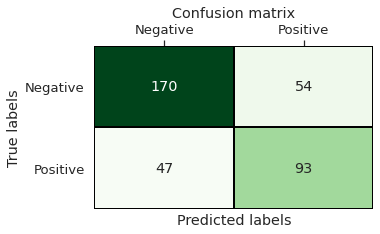

Accuracy: 72.25274725274726%
Precision: 63.26530612244898%
Recall: 66.42857142857143%
F1-score: 64.80836236933797


In [44]:
summary_pred(model,x_test,y_test,0.5)

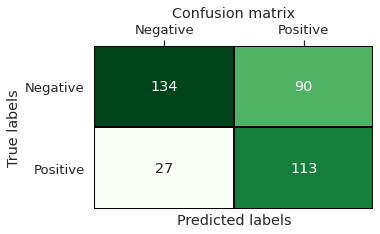

Accuracy: 67.85714285714286%
Precision: 55.66502463054187%
Recall: 80.71428571428572%
F1-score: 65.88921282798835


In [45]:
summary_pred(model,x_test,y_test,0.35)

# *Feauture importance*

In [46]:
# Feature Importance of logistic regression
from matplotlib import pyplot
importance = model.coef_[0]
# summarize feature importance
feature_importances=pd.DataFrame({'features':df.columns,'feature_importance':importance})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
21,analsxever_NO,0.806655
53,group_age_45 - 54,0.690218
12,partlastcndm1_YES,0.688779
28,attitude1_STRONGLY DISAGREE,0.628603
49,hhrmarital_WIDOWED,0.598834
...,...,...
45,hhrmarital_DIVORCED,-0.745202
22,analsxever_YES,-0.773776
26,attitude1_DON'T KNOW,-0.969064
41,educationrwanda_More than Secondary,-1.008681


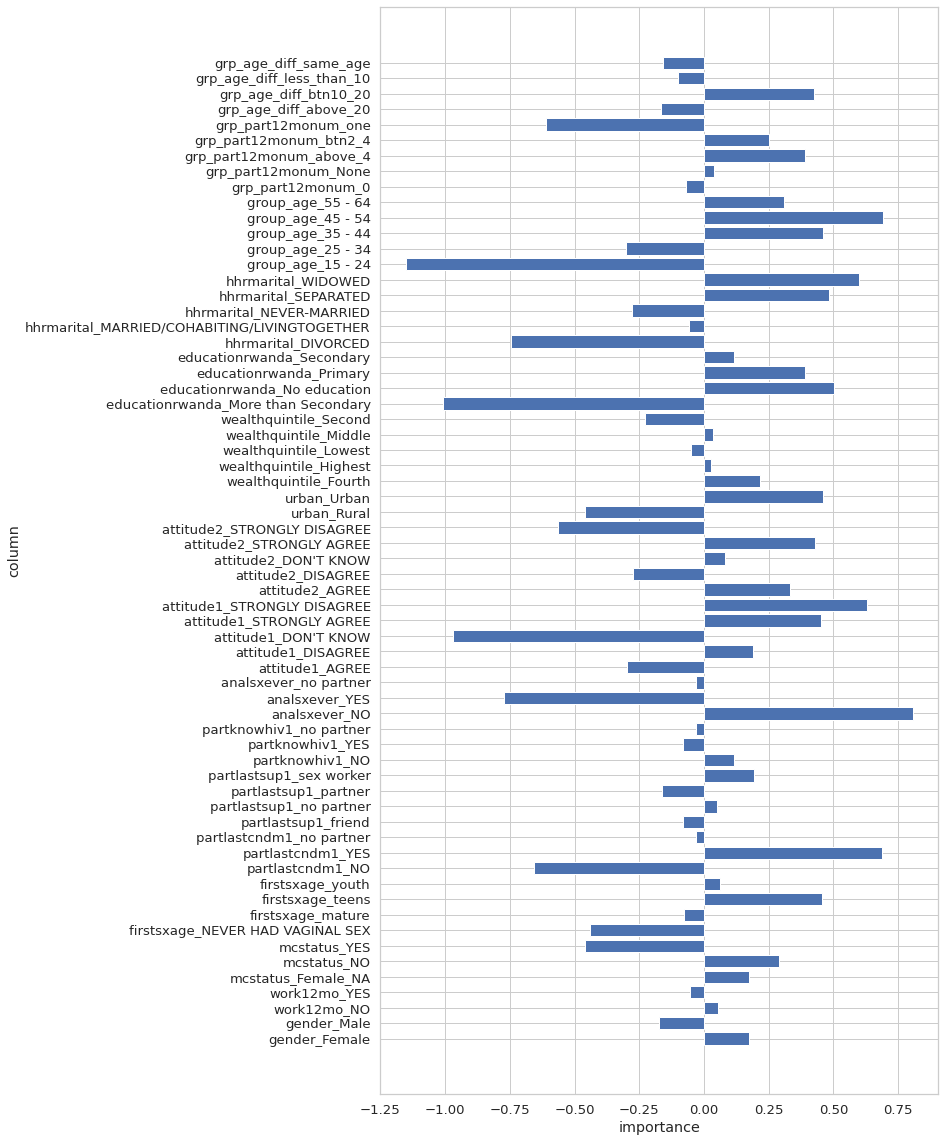

In [47]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,20))
plt.barh(feature_importances.features, feature_importances.feature_importance)
plt.xlabel('importance')
plt.ylabel('column')
display()

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

cl = RandomForestClassifier(n_estimators=10000,max_depth=30, max_features=20, min_samples_leaf=12,random_state=0)
cl.fit(x_train, y_train)
y_pred1 = cl.predict(x_train)
y_pred2 = cl.predict(x_test)
from sklearn import metrics
pred=model.predict(x_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))


Accuracy train: 0.7591623036649214
Accuracy: 0.717032967032967


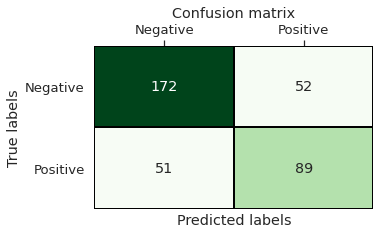

Accuracy: 71.7032967032967%
Precision: 63.12056737588653%
Recall: 63.57142857142857%
F1-score: 63.345195729537366


In [49]:
summary_pred(cl,x_test,y_test,0.5)

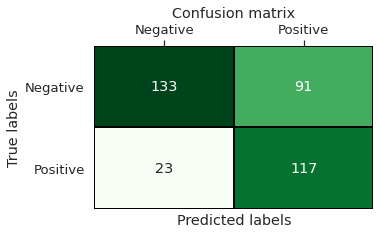

Accuracy: 68.68131868131869%
Precision: 56.25%
Recall: 83.57142857142857%
F1-score: 67.24137931034483


In [50]:
summary_pred(cl,x_test,y_test,0.35)

# *Feauture importance random forest*

In [51]:
from matplotlib import pyplot
importance = cl.feature_importances_
# summarize feature importance
feature_importances=pd.DataFrame({'features':df.columns,'feature_importance':importance})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
50,group_age_15 - 24,0.134748
11,partlastcndm1_NO,0.083730
47,hhrmarital_NEVER-MARRIED,0.068076
12,partlastcndm1_YES,0.065785
7,firstsxage_NEVER HAD VAGINAL SEX,0.064149
...,...,...
26,attitude1_DON'T KNOW,0.000003
45,hhrmarital_DIVORCED,0.000002
55,grp_part12monum_0,0.000000
57,grp_part12monum_above_4,0.000000


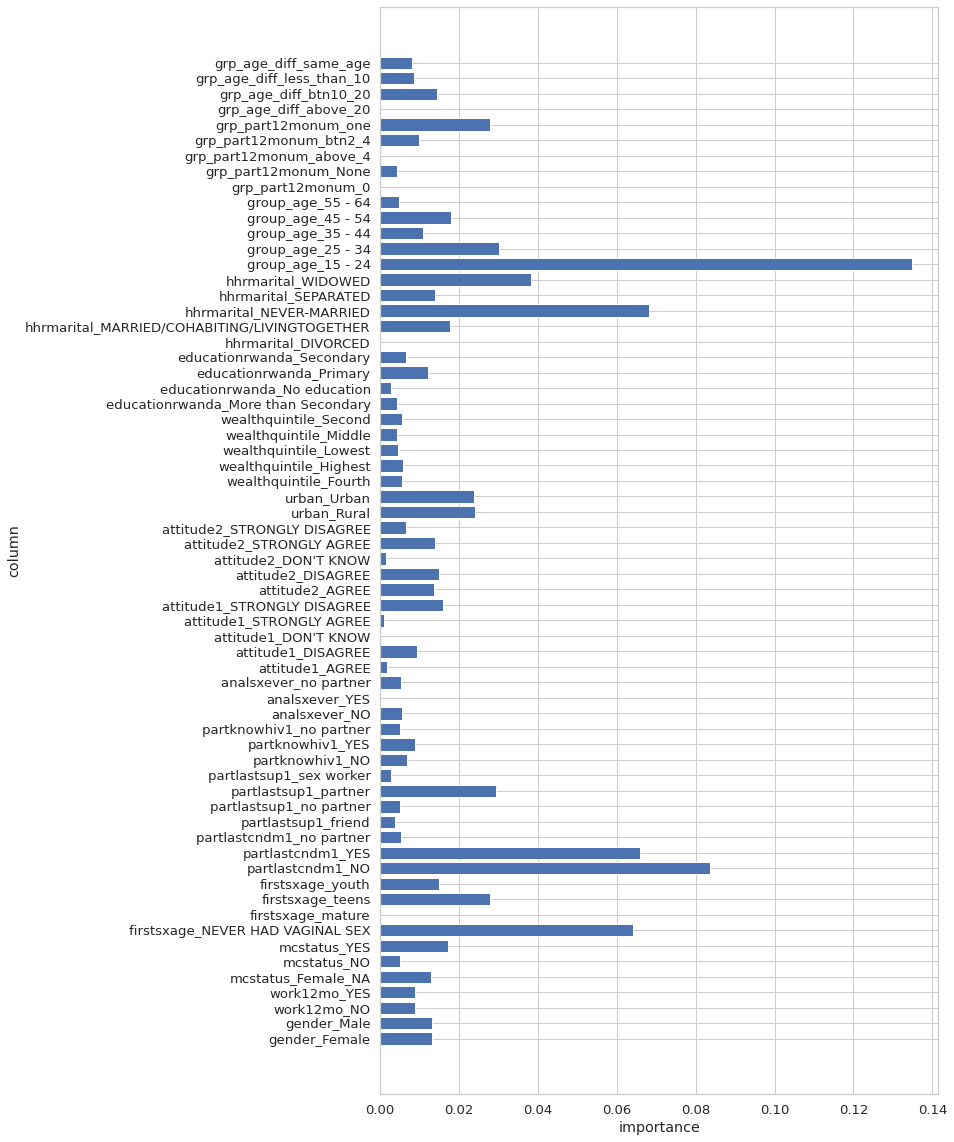

In [52]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,20))
plt.barh(feature_importances.features, feature_importances.feature_importance)
plt.xlabel('importance')
plt.ylabel('column')
display()

# Gradient Boost

In [53]:
#fit the model using GRADIENT BOOSTING CLASSFIER with all features
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
gradient =GradientBoostingClassifier(max_depth=4,n_estimators=30,random_state=1,min_samples_split=2,learning_rate=0.09)
gradient.fit(x_train, y_train)
# make predictions using gradient boosting classifier
yhat = gradient.predict(x_test)
y_pred=gradient.predict(x_train)
# evaluate predictions
test_acc = accuracy_score(y_test, yhat)
print('test_Accuracy: %.2f' % (test_acc*100))

train_acc = accuracy_score(y_train, y_pred)
print('train_Accuracy: %.2f' % (train_acc*100))


test_Accuracy: 72.53
train_Accuracy: 80.63


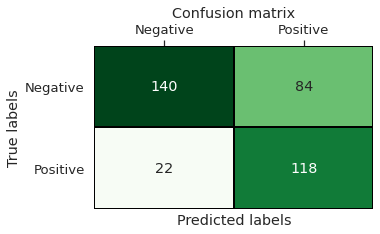

Accuracy: 70.87912087912088%
Precision: 58.415841584158414%
Recall: 84.28571428571429%
F1-score: 69.00584795321636


In [54]:
summary_pred(gradient,x_test,y_test,0.35)

# *Feature Importance Gradient boost*

In [55]:
from matplotlib import pyplot
importance = gradient.feature_importances_
# summarize feature importance
feature_importances=pd.DataFrame({'features':df.columns,'feature_importance':importance})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
50,group_age_15 - 24,2.467197e-01
11,partlastcndm1_NO,1.515221e-01
47,hhrmarital_NEVER-MARRIED,4.873048e-02
16,partlastsup1_partner,4.171266e-02
51,group_age_25 - 34,3.780851e-02
...,...,...
56,grp_part12monum_None,3.819239e-08
55,grp_part12monum_0,0.000000e+00
23,analsxever_no partner,0.000000e+00
46,hhrmarital_MARRIED/COHABITING/LIVINGTOGETHER,0.000000e+00


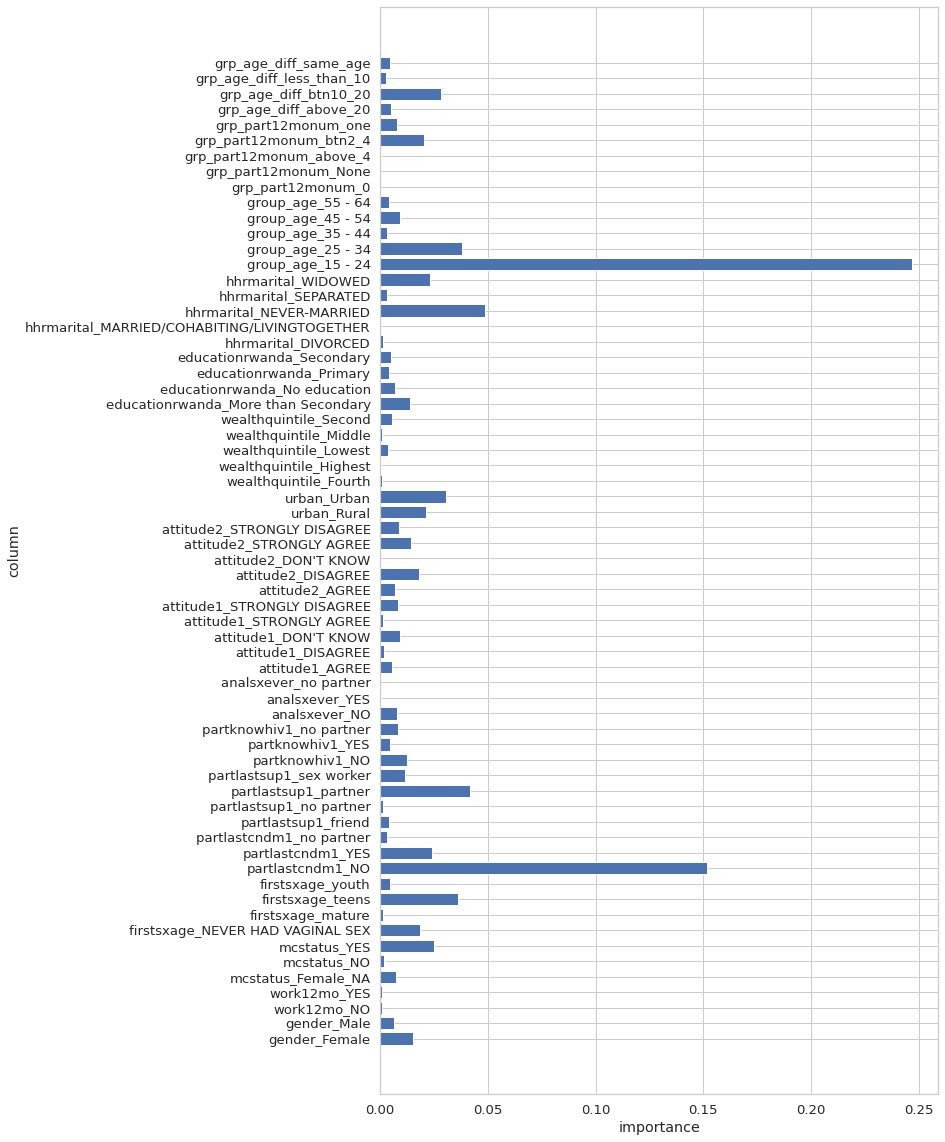

In [56]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,20))
plt.barh(feature_importances.features, feature_importances.feature_importance)
plt.xlabel('importance')
plt.ylabel('column')
display()

# with Cross validation

In [ ]:
#import visualization libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install pyreadstat
# import pyreadstat
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Split data into train/test using stratified K fold
# Define the split - into 5 folds 

skf = StratifiedKFold(n_splits=8,random_state=None, shuffle=False)
skf.get_n_splits(XX,yy)
# returns the number of splitting iterations in the cross-validator

for train_index, test_index in skf.split(XX,yy):
  X_train, X_test = XX[train_index],XX[test_index]
  y_train, y_test = yy[train_index], yy[test_index]
 # summarize train and test composition
  train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
  test_0, test_1= len(y_test[y_test==0]), len(y_test[y_test==1])
  print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=2605, 1=817, Test: 0=372, 1=117
>Train: 0=2605, 1=817, Test: 0=372, 1=117
>Train: 0=2605, 1=817, Test: 0=372, 1=117
>Train: 0=2605, 1=817, Test: 0=372, 1=117
>Train: 0=2605, 1=817, Test: 0=372, 1=117
>Train: 0=2605, 1=817, Test: 0=372, 1=117
>Train: 0=2604, 1=818, Test: 0=373, 1=116
>Train: 0=2605, 1=818, Test: 0=372, 1=116


In [ ]:
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(3423, 49)
(488, 49)
(3423,)
(488,)


In [ ]:
# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
model = LogisticRegression()
# fit the model on the whole dataset
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics
y_pred=model.predict(X_test)
pred=model.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy train: 0.8098159509202454
Accuracy: 0.7868852459016393


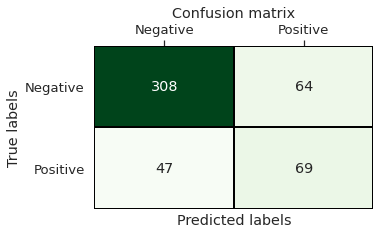

Accuracy: 77.25409836065575%
Precision: 51.8796992481203%
Recall: 59.48275862068966%
F1-score: 55.42168674698795


In [ ]:
summary_pred(model,X_test,y_test,0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(n_estimators=18000,max_depth=10, max_features=10, min_samples_leaf=6,random_state=0)
cl.fit(X_train, y_train)
y_pred1 = cl.predict(X_train)
y_pred2 = cl.predict(X_test)
from sklearn import metrics
pred=model.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))


Accuracy train: 0.8098159509202454
Accuracy: 0.8114754098360656


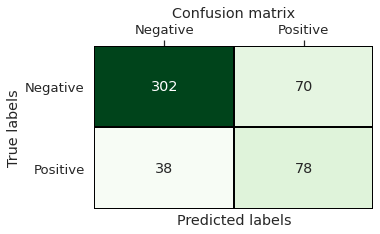

Accuracy: 77.8688524590164%
Precision: 52.702702702702695%
Recall: 67.24137931034483%
F1-score: 59.090909090909086


In [ ]:
summary_pred(cl,X_test,y_test,0.25)

# Exploratory analysis

In [ ]:
# form crosstab with dropna=False between mcstatus and hivstatusfinal
pd.crosstab(data_without_missing_values.mcstatus,data_without_missing_values.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
mcstatus,,
Female_NA,7415,290
NO,3825,138
YES,2704,47


In [ ]:
data_dd['firstsxagedk'].value_counts()

NEVER HAD VAGINAL SEX    7208
DON'T KNOW                103
OUT OF RANGE               62
REFUSED                    42
Name: firstsxagedk, dtype: int64

In [ ]:
data.isnull().sum()

gender                 0
age                    0
work12mo               0
mcstatus               0
firstsxage          3579
part12monum         6469
partlastcndm1      11959
partlastsup1       12164
partknowhiv1       11959
analsxever         11959
hivtesty            6933
hivtstrslt          6930
attitude1              0
attitude2              0
urban                  0
wealthquintile        20
hivstatusfinal         0
educationrwanda       15
hhrmarital             0
hiv_status             0
age_diff           12005
dtype: int64

In [ ]:
df.info()
# /content/lorraine.csv

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39328 entries, 0 to 39327
Columns: 526 entries, country to hepbcwt186
dtypes: datetime64[ns](4), float64(508), object(14)
memory usage: 158.1+ MB


In [ ]:
# # Save submission file
# df.to_csv('lorraine.csv')
# files.download('lorraine.csv')

# Residence

In [ ]:
# urban frequency
df['urban'].value_counts()

Rural    26393
Urban     8872
Name: urban, dtype: int64

# Gender

In [ ]:
# urban frequency
df['province'].value_counts()

west      8383
south     7074
north     6877
kigali    6714
east      6217
Name: province, dtype: int64

In [ ]:
# gender frequency
df['gender'].value_counts()

Female    18988
Male      16277
Name: gender, dtype: int64

# Education

In [ ]:
# school frequency
df['schlhi'].value_counts()

PRIMARY       18390
SECONDARY      7984
HIGHER         1464
REFUSED           3
DON'T KNOW        3
Name: schlhi, dtype: int64

to delete: schlhi, 

In [ ]:
# school frequency
df['educationrwanda'].value_counts()

Primary                18374
Secondary               7984
Missing                 4571
No education            2872
More than Secondary     1464
Name: educationrwanda, dtype: int64

In [ ]:
# replacing NaN in education column from column of other education column
df.educationrwanda[df.educationrwanda == 'Missing'] = df.schlhi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# school frequency
df['educationrwanda'].value_counts()

Primary                18374
Secondary               7984
No education            2872
More than Secondary     1464
REFUSED                    3
DON'T KNOW                 3
Name: educationrwanda, dtype: int64

In [ ]:
df['educationrwanda'].isnull().sum()

15

# HIV status

In [ ]:
# replacing NaN in hiv staus final column column from column of other hiv status
df.hivstatusfinal[df.hivstatusfinal == 'Missing'] = df.hivtstrslt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.hivstatusfinal.isnull().sum()

4556

In [ ]:
df = df[df['hivstatusfinal'].notna()]

In [ ]:
df.hivstatusfinal.isnull().sum()

0

In [ ]:
# Hiv status frequency
df['hivstatusfinal'].value_counts()

HIV Negative    29703
HIV Positive      934
NEGATIVE           72
Name: hivstatusfinal, dtype: int64

In [ ]:
df["hivstatusfinal"]=df["hivstatusfinal"].map({"HIV Positive": "Positive", "HIV Negative": "Negative", "NEGATIVE":"Negative"})

In [ ]:
df.hivtesty.describe()

count    23776.000000
mean      2001.226321
std        171.045963
min         -9.000000
25%       2015.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: hivtesty, dtype: float64

adding new column of new hiv infection

In [ ]:
# creating new variable of negative, old and new HIV infection
filters = [
   (df.hivstatusfinal == 'Negative'),
   (df.hivstatusfinal == 'Positive') & (df.hivtesty >2017.0),
   (df.hivstatusfinal == 'Positive') & (df.hivtesty <2017.0)
]
values = ["Negative", "new_infection", "Old_infection"]
df["hiv_status"] = np.select(filters, values)
df.head()

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner,hiv_status
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,YES,MARRIED,NaN,28.0,NaN,1.0,NaN,HUSBAND/WIFE,MALE,44.0,NO,NO,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,YES,MARRIED,YES,17.0,NaN,1.0,NaN,HUSBAND/WIFE,FEMALE,42.0,NO,NO,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,YES,SEPARATED,NaN,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,NaN,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,NaN,Negative
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,YES,NaN,NaN,24.0,NaN,1.0,NaN,STRANGER,MALE,27.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,partner 1,Negative
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,YES,NaN,YES,22.0,NaN,1.0,NaN,STRANGER,FEMALE,35.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,partner 1,Negative


In [ ]:
# Hiv status frequency
df['hiv_status'].value_counts()

Negative         29775
Old_infection      518
new_infection      265
0                  151
Name: hiv_status, dtype: int64

In [ ]:
# Hiv status frequency
df['hivstatusfinal'].value_counts()

Negative    29775
Positive      934
Name: hivstatusfinal, dtype: int64

In [ ]:
# Hiv status frequency
df['hivtstrslt'].value_counts()

NEGATIVE                      22463
POSITIVE                        690
DID NOT RECEIVE THE RESULT      543
DON'T KNOW                       42
UNCERTAIN/INDETERMINATE          36
REFUSED                           5
Name: hivtstrslt, dtype: int64

In [ ]:
# form crosstab with dropna=False between work12mo and hivstatusfinal
pd.crosstab(df.work12mo,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
work12mo,,
DON'T KNOW,1,0
NO,17832,523
REFUSED,3,0
YES,11939,411


# Work

In [ ]:
# employe last 12 months frequency
df['work12mo'].value_counts()

NO            18355
YES           12350
REFUSED           3
DON'T KNOW        1
Name: work12mo, dtype: int64

to remove: hhrmarital, mcage, partlivew1, partagain1, parthivtest1, parthivsat1, sex12months, sexever, condomlastsex12months, lastpartnerrelation12months

> Indented block



# Marital statust

In [ ]:
# mariatl status frequency
df['curmar'].value_counts()

MARRIED            10206
LIVING TOGETHER     4573
SEPARATED           1519
WIDOWED             1236
DIVORCED             164
REFUSED                7
DON'T KNOW             4
Name: curmar, dtype: int64

In [ ]:
# mariatl status frequency
df['hhrmarital'].value_counts()

MARRIED/COHABITING/LIVINGTOGETHER    14779
NEVER-MARRIED                        12995
SEPARATED                             1519
WIDOWED                               1236
DIVORCED                               164
Missing                                 16
Name: hhrmarital, dtype: int64

In [ ]:
df['curmar'].isnull().sum()

13000

In [ ]:
# form crosstab with dropna=False between curmar and hivstatusfinal
pd.crosstab(df.curmar,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
curmar,,
DIVORCED,157,7
DON'T KNOW,4,0
LIVING TOGETHER,4354,219
MARRIED,9969,237
REFUSED,6,1
SEPARATED,1381,138
WIDOWED,1084,152


# Male circumcision


In [ ]:
# circumcision status frequency
df['mcstatus'].value_counts()

NO            7581
YES           6227
REFUSED          5
DON'T KNOW       4
Name: mcstatus, dtype: int64

In [ ]:
df.mcstatus.isnull().sum()

16892

In [ ]:
# form crosstab with dropna=False between mcstatus and hivstatusfinal
pd.crosstab(df.mcstatus,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
mcstatus,,
DON'T KNOW,4,0
NO,7363,218
REFUSED,5,0
YES,6143,84


In [ ]:
# form crosstab with dropna=False between mcstatus and hivstatusfinal
pd.crosstab(df.mcstatus,df.gender, dropna=False)

gender,Female,Male
mcstatus,,
DON'T KNOW,0,4
NO,0,7581
REFUSED,0,5
YES,0,6227


In [ ]:
# replacing NaN in education column from column of other education column
# df.mcstatus[df.mcstatus == 'NaN'] = df.gender
# Apply the function
df['mcstatus'] = df['mcstatus'].replace(np.nan, 0)

In [ ]:
df.mcstatus.isnull().sum()

0

In [ ]:
# replacing NaN in education column from column of other education column
df.mcstatus[df.mcstatus == 0] = df.gender

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# form crosstab with dropna=False between mcstatus and gender
pd.crosstab(df.mcstatus,df.gender, dropna=False)

gender,Female,Male
mcstatus,,
DON'T KNOW,0,4
Female,16892,0
NO,0,7581
REFUSED,0,5
YES,0,6227


In [ ]:
df["mcstatus"]=df["mcstatus"].map({"NO": "NO", "YES": "YES", "Female":"Female_NA","DON'T KNOW":"NO","REFUSED":"NO"})

In [ ]:
# form crosstab with dropna=False between mcstatus and gender
pd.crosstab(df.mcstatus,df.gender, dropna=False)

gender,Female,Male
mcstatus,,
Female_NA,16892,0
NO,0,7590
YES,0,6227


Age at first sex

In [ ]:
df.age.describe()

count    30709.000000
mean        31.630955
std         12.960183
min         15.000000
25%         21.000000
50%         29.000000
75%         40.000000
max         64.000000
Name: age, dtype: float64

In [ ]:
df['partage1'] = df['partage1'].replace(np.nan, 0)
df.partage1[df.partage1 == 0] = df.partage2
df.partage1[df.partage1 == 0] = df.partage3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# age difference
df['age_diff']=df['age']-df['partage1']
df['age_diff']=df['age_diff'].abs()
df.head()

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner,hiv_status,AgeGroup_fsx,analsex,age_diff
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,YES,MARRIED,Female_NA,28.0,NaN,1.0,NaN,partner,MALE,44.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Youth,True,2.0
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,YES,MARRIED,YES,17.0,NaN,1.0,NaN,partner,FEMALE,42.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Teens,True,2.0
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,YES,SEPARATED,Female_NA,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,NaN,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,NaN,Negative,Youth,True,NaN
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,YES,NaN,Female_NA,24.0,NaN,1.0,NaN,sex worker,MALE,27.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,partner 1,Negative,Youth,True,3.0
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,YES,NaN,YES,22.0,NaN,1.0,NaN,sex worker,FEMALE,35.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,partner 1,Negative,Youth,True,7.0


In [ ]:
df.age_diff.isnull().sum()

12005

In [ ]:
df.age_diff.describe()

count    18704.000000
mean         5.025877
std          5.083232
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         53.000000
Name: age_diff, dtype: float64

In [ ]:
df.firstsxage.describe()

count    23294.000000
mean        20.202842
std          4.101169
min         14.000000
25%         18.000000
50%         20.000000
75%         22.000000
max         35.000000
Name: firstsxage, dtype: float64

In [ ]:
df.firstsxage.isnull().sum()

7415

In [ ]:
# firstsxagedk
bins= [0,20,30,36]
labels = ['Teens','Youth','Mature']
df['AgeGroup_fsx'] = pd.cut(df['firstsxage'], bins=bins, labels=labels, right=False)

In [ ]:

# reason of not reporting age at first sex frequency
df['firstsxagedk'].value_counts()

NEVER HAD VAGINAL SEX    7208
DON'T KNOW                103
OUT OF RANGE               62
REFUSED                    42
Name: firstsxagedk, dtype: int64

In [ ]:
# reason of not reporting age at first sex frequency
df['AgeGroup_fsx'].value_counts()

Youth     11360
Teens     11189
Mature      745
Name: AgeGroup_fsx, dtype: int64

In [ ]:
df.AgeGroup_fsx.isnull().sum()

7415

In [ ]:
df.tail()

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner,hiv_status,AgeGroup_fsx
35256,Rwanda,RW000000011838,RW00000001183802,RW000241,kigali,Female,20,PRIMARY,NO,LIVING TOGETHER,Female_NA,NaN,DON'T KNOW,1.0,NaN,partner,MALE,24.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,AGREE,Urban,Highest,Negative,Primary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,NaN
35257,Rwanda,RW000000011839,RW00000001183901,RW000278,south,Male,36,NaN,YES,LIVING TOGETHER,NO,30.0,NaN,1.0,NaN,partner,MALE,26.0,NO,partner,DON'T KNOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2007.0,NEGATIVE,NaN,DISAGREE,AGREE,Rural,Second,Negative,No education,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Mature
35258,Rwanda,RW000000011839,RW00000001183902,RW000278,south,Female,26,SECONDARY,NO,LIVING TOGETHER,Female_NA,21.0,NaN,1.0,NaN,partner,MALE,36.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY AGREE,Rural,Second,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Youth
35259,Rwanda,RW000000011841,RW00000001184101,RW000365,kigali,Female,48,PRIMARY,NO,NaN,Female_NA,NaN,NEVER HAD VAGINAL SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,NaN,Negative,NaN
35261,Rwanda,RW000000011841,RW00000001184103,RW000365,kigali,Female,43,PRIMARY,NO,WIDOWED,Female_NA,22.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,Primary,WIDOWED,NaN,Negative,Youth


In [ ]:
# form crosstab with dropna=False between curmar and df.curmar
pd.crosstab(df.mcstatus,df.curmar, dropna=False)

curmar,DIVORCED,DON'T KNOW,LIVING TOGETHER,MARRIED,REFUSED,SEPARATED,WIDOWED
mcstatus,,,,,,,
Female_NA,115,3,2541,5485,5,1215,1162
NO,29,0,1266,3293,1,203,63
YES,20,1,766,1428,1,101,11


In [ ]:
# form crosstab with dropna=False between firstsxagedk and hivstatusfinal
pd.crosstab(df.firstsxagedk,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
firstsxagedk,,
DON'T KNOW,97,6
NEVER HAD VAGINAL SEX,7178,30
OUT OF RANGE,61,1
REFUSED,40,2


# number of partner and relation

In [ ]:
df.part12monum.describe()

count    24240.000000
mean         0.921535
std          0.785317
min         -7.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: part12monum, dtype: float64

In [ ]:
df.part12monum.isnull().sum()

6469

In [ ]:
# reason of not reporting number of partner frequency
df['part12monum'].value_counts()

 1.0    16301
 0.0     5465
 2.0     1641
 3.0      538
 4.0      113
 6.0       79
 5.0       78
-7.0       25
Name: part12monum, dtype: int64

In [ ]:
# reason of not reporting number of partner frequency
df['part12modkr'].value_counts()

REFUSED       20
DON'T KNOW    18
Name: part12modkr, dtype: int64

In [ ]:
# if she lives with partner frequency
df['partrelation1'].value_counts()

HUSBAND/WIFE                          11088
FRIEND/ACQUAINTANCE                    3212
LIVE-IN PARTNER                        2995
PARTNER NOT LIVING WITH RESPONDENT      587
EX-SPOUSE/EX-PARTNER                    346
STRANGER                                291
SEX WORKER                              122
SEX WORKER CLIENT                        26
REFUSED                                   7
DON'T KNOW                                4
Name: partrelation1, dtype: int64

In [ ]:
df["partrelation1"]=df["partrelation1"].map({"HUSBAND/WIFE": "partner", "LIVE-IN PARTNER":"partner","FRIEND/ACQUAINTANCE":"Friend", "PARTNER NOT LIVING WITH RESPONDENT":"Friend",
                                   "EX-SPOUSE/EX-PARTNER":"Friend","STRANGER":"sex worker","SEX WORKER":"sex worker","SEX WORKER CLIENT":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})

In [ ]:
# if she lives with partner frequency
df['partrelation1'].value_counts()

partner       14083
Friend         4145
sex worker      450
Name: partrelation1, dtype: int64

In [ ]:
df.partrelation1.isnull().sum()

12031

In [ ]:
# form crosstab with dropna=False between firstsxagedk and hivstatusfinal
pd.crosstab(df.partrelation1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partrelation1,,
Friend,3962,183
partner,13655,428
sex worker,425,25


In [ ]:
# if she lives with partner frequency
df['partlastsup1'].value_counts()

NO            17868
YES             721
DON'T KNOW        9
REFUSED           4
Name: partlastsup1, dtype: int64

In [ ]:
# form crosstab with dropna=False between paying sex and hivstatusfinal
pd.crosstab(df.partlastsup1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partlastsup1,,
DON'T KNOW,9,0
NO,17300,568
REFUSED,4,0
YES,664,57


In [ ]:
 df.partlastsup1[df.partlastsup1 == "NO"] = df.partrelation1
 df.partlastsup1[df.partlastsup1 == "NO"] = df.partlastsup2
 df.partlastsup1[df.partlastsup1 == "NO"] = df.partlastsup3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df.partlastsup1.isnull().sum()

12170

In [ ]:
# if she lives with partner frequency
df['partlastsup1'].value_counts()

partner       13970
friend         3575
sex worker     1000
Name: partlastsup1, dtype: int64

In [ ]:
df["partlastsup1"]=df["partlastsup1"].map({"partner": "partner","Friend":"friend","YES":"sex worker","sex worker":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})

In [ ]:
# if she lives with partner frequency
df['partlastsup1'].value_counts()

partner       13970
friend         3575
sex worker      994
Name: partlastsup1, dtype: int64

In [ ]:
# form crosstab with dropna=False between paying sex and hivstatusfinal
pd.crosstab(df.partlastsup1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partlastsup1,,
friend,3436,139
partner,13550,420
sex worker,928,66


In [ ]:
# the rate of HIV positive depending on partner relations
print('friend :',(139/3436)*100)
print('partner :', (420/13550)*100)
print('sex worker :', (66/928)*100)

friend : 4.045401629802096
partner : 3.0996309963099633
sex worker : 7.112068965517242


In [ ]:
#  df.partlastsup1[df.partlastsup1].replace(np.nan, 0)
df['partlastsup1'].fillna(0, inplace=True)
df.partlastsup1[df.partlastsup1 == 0] = df.partlastsup2
df.partlastsup1[df.partlastsup1 == 0] = df.partlastsup3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#  partlastsup2 frequency
df['partlastsup1'].value_counts()

partner       13970
friend         3575
sex worker      994
NO               62
YES               6
Name: partlastsup1, dtype: int64

In [ ]:
df["partlastsup1"]=df["partlastsup1"].map({"partner": "partner","friend":"friend","YES":"sex worker","sex worker":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})

In [ ]:
#  partlastsup2 frequency
df['partlastsup1'].value_counts()

partner       13970
friend         3575
sex worker     1000
Name: partlastsup1, dtype: int64

In [ ]:
#  partlastsup2 frequency
df['hivstatusfinal'].value_counts()

Negative    29775
Positive      934
Name: hivstatusfinal, dtype: int64

In [ ]:
# form crosstab with dropna=False between paying sex and hivstatusfinal
pd.crosstab(df.partlastsup1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partlastsup1,,
friend,3436,139
partner,13550,420
sex worker,934,66


In [ ]:
139+420+66

625

In [ ]:
#  partlastsup2 frequency
df['partlastsup2'].value_counts()

NO            2061
YES            258
REFUSED          3
DON'T KNOW       1
Name: partlastsup2, dtype: int64

In [ ]:
#  partlastsup3 frequency
df['partlastsup3'].value_counts()

NO            629
YES            90
REFUSED         3
DON'T KNOW      1
Name: partlastsup3, dtype: int64

In [ ]:

#  last partner condom used frequency
df['partlastcndm1'].value_counts()

NO            15829
YES            2911
REFUSED           5
DON'T KNOW        5
Name: partlastcndm1, dtype: int64

In [ ]:
df.partlastcndm1.isnull().sum()

11959

In [ ]:
# form crosstab with dropna=False between curmar and df.curmar
pd.crosstab(df.partlastcndm1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partlastcndm1,,
DON'T KNOW,4,1
NO,15430,399
REFUSED,5,0
YES,2675,236


In [ ]:
# paid sex frequency
df['partlastsup1'].value_counts()

partner       13970
friend         3575
sex worker     1000
Name: partlastsup1, dtype: int64

In [ ]:
# form crosstab with dropna=False between curmar and df.curmar
pd.crosstab(df.partlastsup1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partlastsup1,,
friend,3436,139
partner,13550,420
sex worker,934,66


In [ ]:
# know HIV status of partner frequency
df['partknowhiv1'].value_counts()


YES           13865
NO             4622
DON'T KNOW      259
REFUSED           4
Name: partknowhiv1, dtype: int64

In [ ]:
# df["partknowhiv1"]=df["partknowhiv1"].map({"YES": "YES","NO":"NO","DON'T KNOW":"DON'T KNOW","sex worker":"sex worker",
#                                    "REFUSED":"sex worker","DON'T KNOW":"sex worker"})

In [ ]:
df.partknowhiv1.isnull().sum()

16515

In [ ]:
#  df.partlastsup1[df.partlastsup1].replace(np.nan, 0)
df['partknowhiv1'].fillna(0, inplace=True)
df.partknowhiv1[df.partknowhiv1 == 0] = df.partknowhiv2
df.partknowhiv1[df.partknowhiv1 == 0] = df.partknowhiv3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.partknowhiv1.isnull().sum()

16515

In [ ]:
# anal sex frequency
df['analsxever'].value_counts()


NO            18639
YES              78
DON'T KNOW       21
REFUSED          12
Name: analsxever, dtype: int64

In [ ]:
df['analsex'] = np.where(df['gender']!= df['partgend1'], True, False)
df.head()

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner,hiv_status,AgeGroup_fsx,analsex
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,YES,MARRIED,Female_NA,28.0,NaN,1.0,NaN,partner,MALE,44.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Youth,True
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,YES,MARRIED,YES,17.0,NaN,1.0,NaN,partner,FEMALE,42.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Teens,True
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,YES,SEPARATED,Female_NA,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,NaN,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,NaN,Negative,Youth,True
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,YES,NaN,Female_NA,24.0,NaN,1.0,NaN,sex worker,MALE,27.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,partner 1,Negative,Youth,True
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,YES,NaN,YES,22.0,NaN,1.0,NaN,sex worker,FEMALE,35.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,partner 1,Negative,Youth,True


In [ ]:
# Wealth quantile frequency
df['analsex'].value_counts()

True    30709
Name: analsex, dtype: int64

In [ ]:

# Wealth quantile frequency
df['wealthquintile'].value_counts()

Highest    9173
Fourth     6941
Middle     6628
Second     6405
Lowest     6097
Name: wealthquintile, dtype: int64